Import Library requirements for project

In [1]:
# ============================================
# IMPORTS
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("✓ Libraries loaded")

✓ Libraries loaded


Load data base

In [2]:
# ============================================
# DATA LOADING
# ============================================
df = pd.read_excel('donnees_immobilieres_extended.xlsx')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst rows:")
display(df.head())

print(f"\nData types:")
display(df.dtypes)

print(f"\nMissing values:")
display(df.isnull().sum())

Dataset shape: (150, 12)

First rows:


,ID,Surface_m2,Chambres,Annee_construction,Distance_centre_km,Etage,Ascenseur,Annee_vente,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
0,1,139.87,3,1982,21.33,2,1,2023,1.1,47.5,11.9,1961.68
1,2,114.47,4,1991,2.90,5,1,2022,4.7,44.2,11.9,2303.67
2,3,145.91,2,2005,3.00,3,1,2017,3.2,53.8,10.7,2224.12
3,4,180.92,4,1995,29.61,3,1,2022,6.1,68.3,11.1,2425.63
4,5,110.63,3,2016,11.54,0,0,2021,9.0,81.9,10.8,2323.34



Data types:


ID                          int64
Surface_m2                float64
Chambres                    int64
Annee_construction          int64
Distance_centre_km        float64
Etage                       int64
Ascenseur                   int64
Annee_vente                 int64
Qualite_ecole             float64
Revenu_median_quartier    float64
Distance_universite       float64
Prix_milliers_euros       float64
dtype: object


Missing values:


ID                        0
Surface_m2                0
Chambres                  0
Annee_construction        0
Distance_centre_km        0
Etage                     0
Ascenseur                 0
Annee_vente               0
Qualite_ecole             0
Revenu_median_quartier    0
Distance_universite       0
Prix_milliers_euros       0
dtype: int64

DESCRIPTIVE STATISTICS

In [3]:

# Basic stats for all numeric variables
stats_desc = df.describe().T
stats_desc['median'] = df.median()
stats_desc['skewness'] = df.skew()
stats_desc['kurtosis'] = df.kurtosis()

# Reorder columns
cols_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']
stats_desc = stats_desc[cols_order]

print("="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)
display(stats_desc)

# Detailed analysis of dependent variable: Price
print("\n" + "="*80)
print("PRICE ANALYSIS (DEPENDENT VARIABLE)")
print("="*80)

precio_stats = {
    'Mean': df['Prix_milliers_euros'].mean(),
    'Median': df['Prix_milliers_euros'].median(),
    'Std Dev': df['Prix_milliers_euros'].std(),
    'Min': df['Prix_milliers_euros'].min(),
    'Max': df['Prix_milliers_euros'].max(),
    'Q1 (25%)': df['Prix_milliers_euros'].quantile(0.25),
    'Q3 (75%)': df['Prix_milliers_euros'].quantile(0.75),
    'IQR': df['Prix_milliers_euros'].quantile(0.75) - df['Prix_milliers_euros'].quantile(0.25),
    'Skewness': df['Prix_milliers_euros'].skew(),
    'Kurtosis': df['Prix_milliers_euros'].kurtosis()
}

for key, value in precio_stats.items():
    print(f"{key:15s}: {value:10.2f}")

# Interpretation
print("\n" + "-"*80)
print("INTERPRETATION:")
print("-"*80)

skew = precio_stats['Skewness']
kurt = precio_stats['Kurtosis']

# Skewness interpretation
if abs(skew) < 0.5:
    print(f"• Skewness = {skew:.2f} → Approximately SYMMETRIC")
elif skew > 0.5:
    print(f"• Skewness = {skew:.2f} → POSITIVE SKEW (right tail)")
    print("  → Few expensive houses pulling mean up")
    print("  → CONSIDER log transformation")
else:
    print(f"• Skewness = {skew:.2f} → NEGATIVE SKEW (left tail)")

# Kurtosis interpretation
if abs(kurt - 3) < 0.5:
    print(f"• Kurtosis = {kurt:.2f} → Normal-like distribution")
elif kurt > 3:
    print(f"• Kurtosis = {kurt:.2f} → LEPTOKURTIC (peaked, more outliers)")
else:
    print(f"• Kurtosis = {kurt:.2f} → PLATYKURTIC (flat)")

DESCRIPTIVE STATISTICS


,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
ID,150.0,75.50,75.50,43.45,1.00,38.25,75.50,112.75,150.00,0.00,-1.20
Surface_m2,150.0,116.71,117.84,37.69,15.21,93.24,117.84,139.64,218.53,0.05,-0.11
Chambres,150.0,2.89,3.00,1.08,1.00,2.00,3.00,4.00,5.00,0.10,-0.69
Annee_construction,150.0,2001.83,2002.50,11.70,1980.00,1991.00,2002.50,2012.00,2022.00,-0.08,-1.17
Distance_centre_km,150.0,16.50,16.87,9.02,0.83,9.11,16.87,24.70,29.99,-0.14,-1.19
Etage,150.0,2.58,2.50,1.76,0.00,1.00,2.50,4.00,5.00,-0.01,-1.34
Ascenseur,150.0,0.46,0.00,0.50,0.00,0.00,0.00,1.00,1.00,0.16,-2.00
Annee_vente,150.0,2019.84,2020.00,2.29,2015.00,2018.00,2020.00,2022.00,2023.00,-0.32,-1.01
Qualite_ecole,150.0,5.47,5.60,1.87,1.00,4.12,5.60,7.00,10.00,-0.15,-0.50
Revenu_median_quartier,150.0,63.67,63.45,9.30,42.90,57.50,63.45,70.47,83.90,0.05,-0.58



PRICE ANALYSIS (DEPENDENT VARIABLE)
Mean           :    2107.90
Median         :    2105.05
Std Dev        :     229.92
Min            :    1500.77
Max            :    2743.04
Q1 (25%)       :    1934.29
Q3 (75%)       :    2272.78
IQR            :     338.49
Skewness       :       0.16
Kurtosis       :      -0.47

--------------------------------------------------------------------------------
INTERPRETATION:
--------------------------------------------------------------------------------
• Skewness = 0.16 → Approximately SYMMETRIC
• Kurtosis = -0.47 → PLATYKURTIC (flat)


# ============================================
# SECTION 1.1 - VISUALIZATIONS
# ============================================

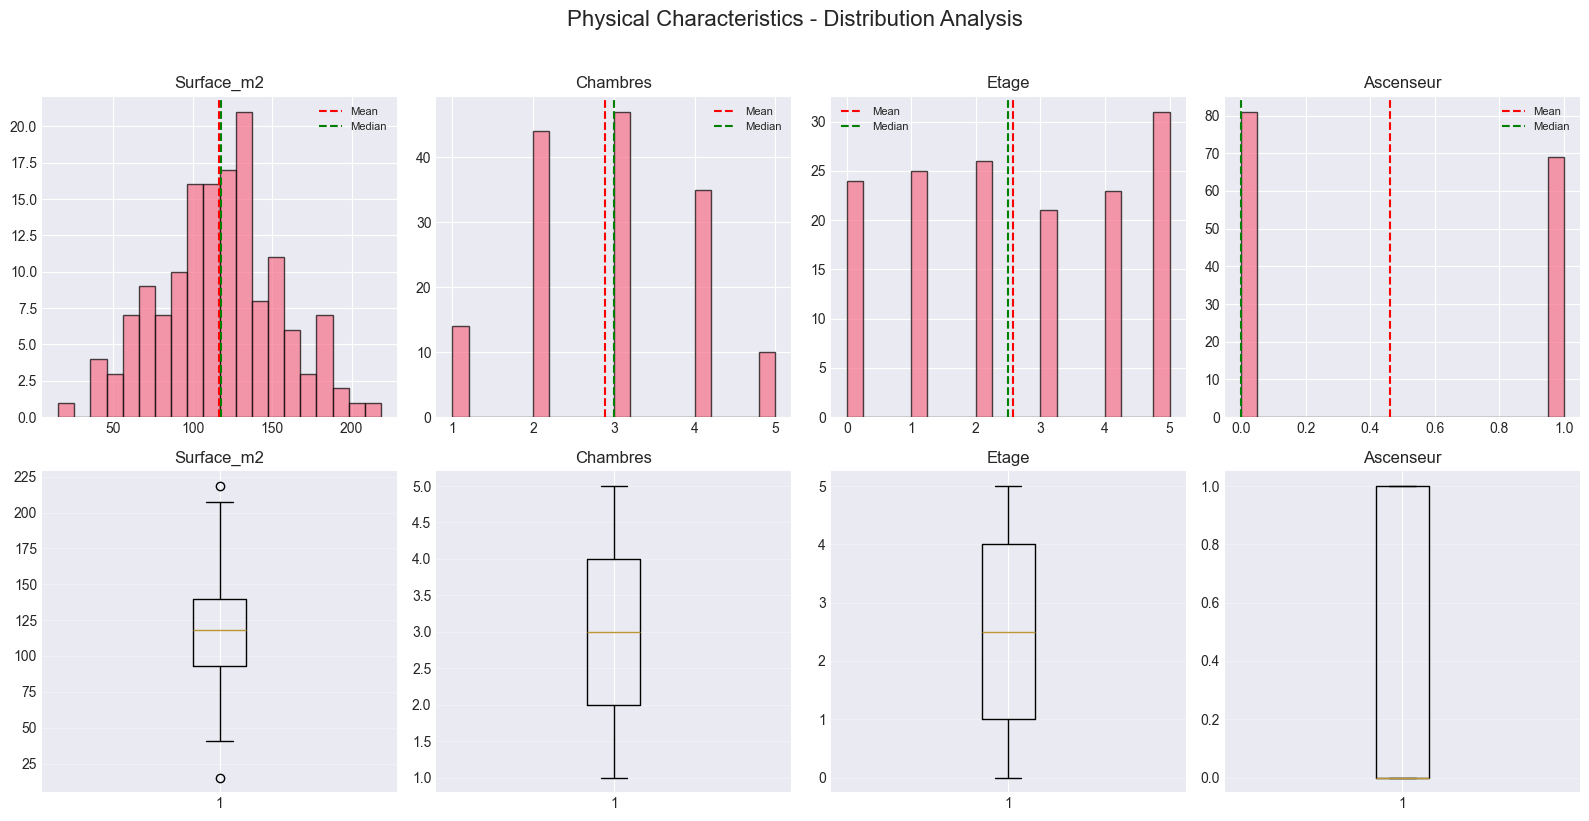

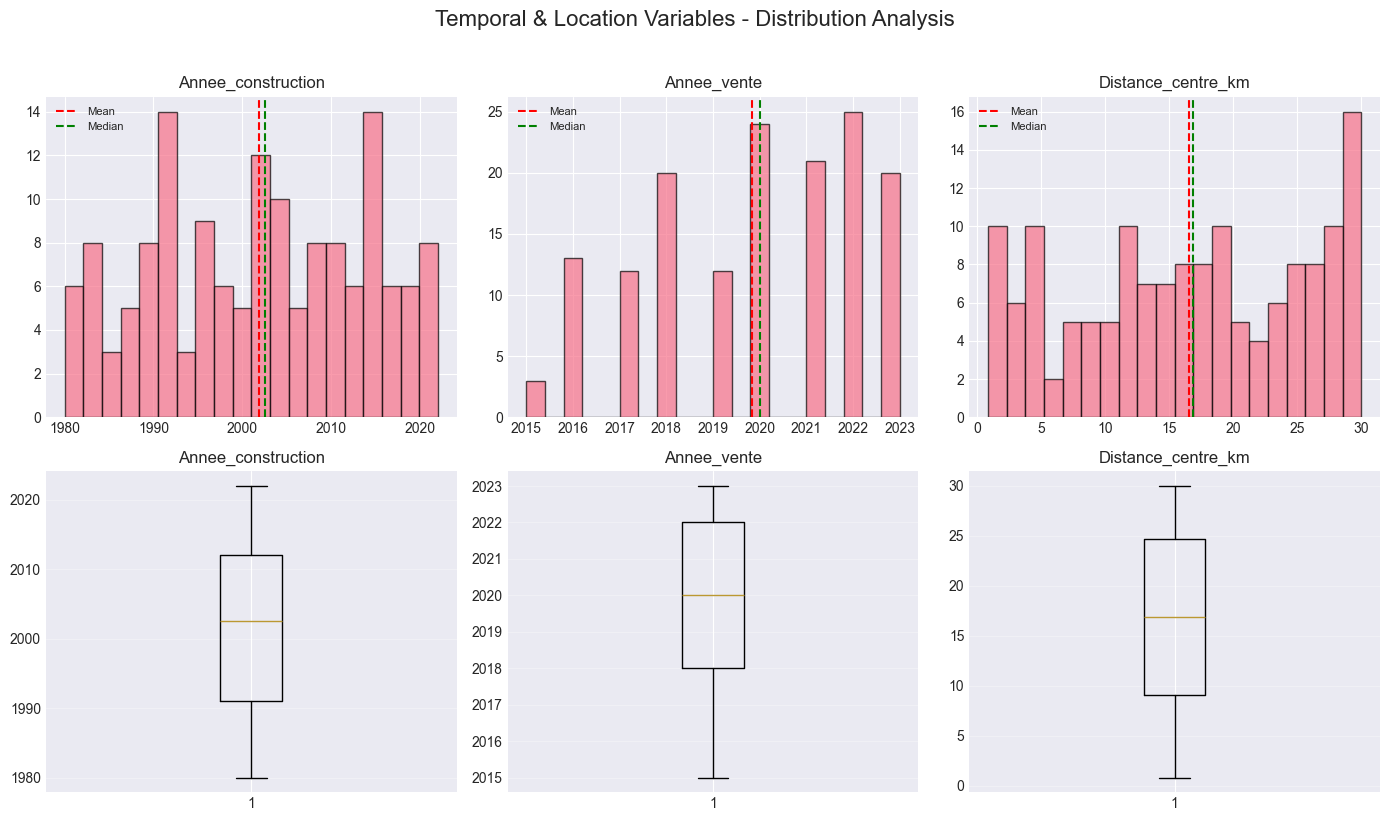

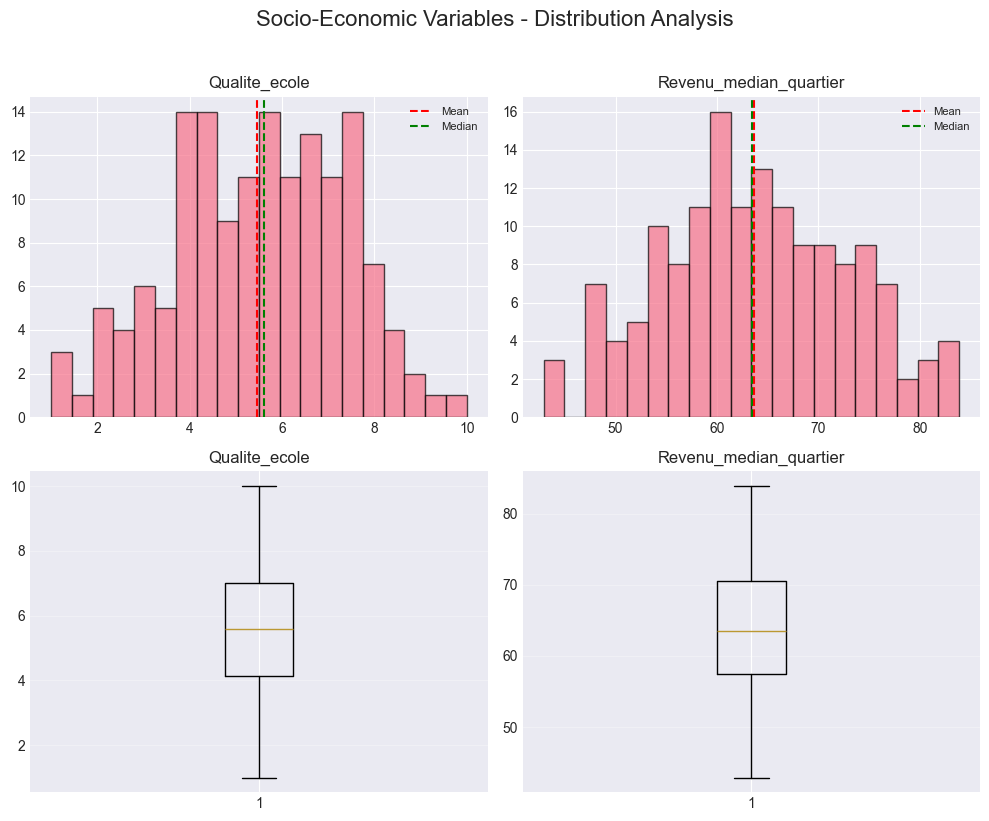

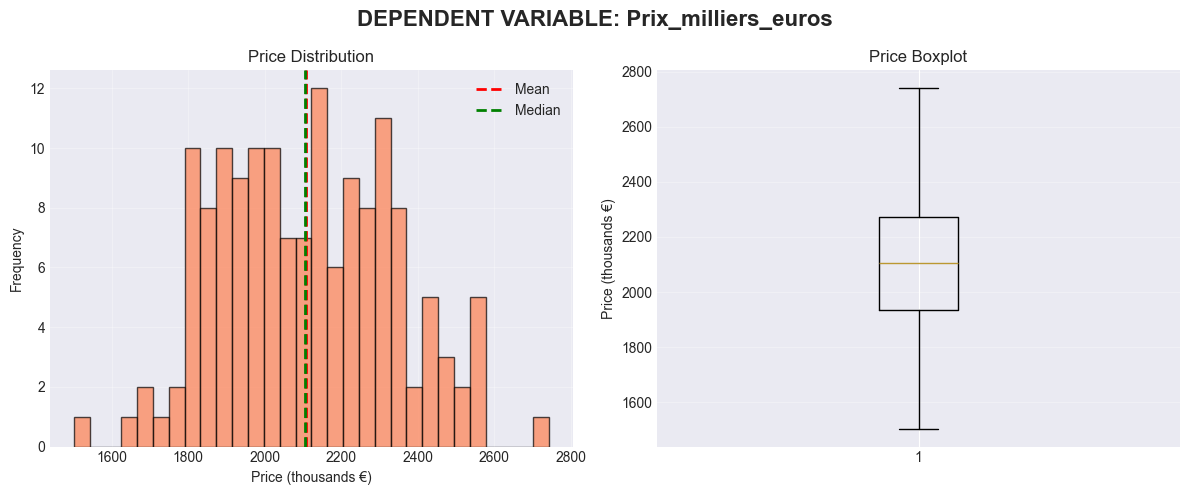

In [4]:

# Group 1: Physical characteristics
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Physical Characteristics - Distribution Analysis', fontsize=16, y=1.02)

physical_vars = ['Surface_m2', 'Chambres', 'Etage', 'Ascenseur']

for i, var in enumerate(physical_vars):
    # Histogram
    axes[0, i].hist(df[var], bins=20, edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f'{var}')
    axes[0, i].set_xlabel('')
    axes[0, i].axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
    axes[0, i].axvline(df[var].median(), color='green', linestyle='--', label='Median')
    axes[0, i].legend(fontsize=8)
    
    # Boxplot
    axes[1, i].boxplot(df[var], vert=True)
    axes[1, i].set_title(f'{var}')
    axes[1, i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Group 2: Temporal and location
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle('Temporal & Location Variables - Distribution Analysis', fontsize=16, y=1.02)

temporal_vars = ['Annee_construction', 'Annee_vente', 'Distance_centre_km']

for i, var in enumerate(temporal_vars):
    # Histogram
    axes[0, i].hist(df[var], bins=20, edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f'{var}')
    axes[0, i].set_xlabel('')
    axes[0, i].axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
    axes[0, i].axvline(df[var].median(), color='green', linestyle='--', label='Median')
    axes[0, i].legend(fontsize=8)
    
    # Boxplot
    axes[1, i].boxplot(df[var], vert=True)
    axes[1, i].set_title(f'{var}')
    axes[1, i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Group 3: Socio-economic
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Socio-Economic Variables - Distribution Analysis', fontsize=16, y=1.02)

socio_vars = ['Qualite_ecole', 'Revenu_median_quartier']

for i, var in enumerate(socio_vars):
    # Histogram
    axes[0, i].hist(df[var], bins=20, edgecolor='black', alpha=0.7)
    axes[0, i].set_title(f'{var}')
    axes[0, i].set_xlabel('')
    axes[0, i].axvline(df[var].mean(), color='red', linestyle='--', label='Mean')
    axes[0, i].axvline(df[var].median(), color='green', linestyle='--', label='Median')
    axes[0, i].legend(fontsize=8)
    
    # Boxplot
    axes[1, i].boxplot(df[var], vert=True)
    axes[1, i].set_title(f'{var}')
    axes[1, i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Group 4: DEPENDENT VARIABLE - Price (special attention)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('DEPENDENT VARIABLE: Prix_milliers_euros', fontsize=16, fontweight='bold')

# Histogram
axes[0].hist(df['Prix_milliers_euros'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price (thousands €)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['Prix_milliers_euros'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(df['Prix_milliers_euros'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
axes[1].boxplot(df['Prix_milliers_euros'], vert=True)
axes[1].set_title('Price Boxplot')
axes[1].set_ylabel('Price (thousands €)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# SECTION 1.2 - CORRELATION ANALYSIS
# ============================================

CORRELATION MATRIX


,Surface_m2,Chambres,Annee_construction,Distance_centre_km,Etage,Ascenseur,Annee_vente,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
Surface_m2,1.00,0.59,-0.03,-0.07,0.06,-0.06,0.06,0.04,0.01,-0.09,0.83
Chambres,0.59,1.00,0.04,-0.10,0.05,-0.01,0.04,-0.01,0.01,-0.09,0.61
Annee_construction,-0.03,0.04,1.00,-0.09,-0.04,-0.10,-0.06,-0.01,0.03,-0.01,0.07
Distance_centre_km,-0.07,-0.10,-0.09,1.00,0.02,0.08,0.08,0.04,0.11,-0.06,-0.31
Etage,0.06,0.05,-0.04,0.02,1.00,-0.08,0.13,-0.03,0.04,0.08,0.13
Ascenseur,-0.06,-0.01,-0.10,0.08,-0.08,1.00,-0.08,0.06,0.08,-0.06,0.04
Annee_vente,0.06,0.04,-0.06,0.08,0.13,-0.08,1.00,0.02,0.01,0.03,0.24
Qualite_ecole,0.04,-0.01,-0.01,0.04,-0.03,0.06,0.02,1.00,0.60,-0.44,0.25
Revenu_median_quartier,0.01,0.01,0.03,0.11,0.04,0.08,0.01,0.60,1.00,-0.30,0.21
Distance_universite,-0.09,-0.09,-0.01,-0.06,0.08,-0.06,0.03,-0.44,-0.30,1.00,-0.12



CORRELATION WITH PRICE (sorted by absolute value)


Prix_milliers_euros       1.00
Surface_m2                0.83
Chambres                  0.61
Qualite_ecole             0.25
Annee_vente               0.24
Revenu_median_quartier    0.21
Etage                     0.13
Annee_construction        0.07
Ascenseur                 0.04
Distance_universite      -0.12
Distance_centre_km       -0.31
Name: Prix_milliers_euros, dtype: float64

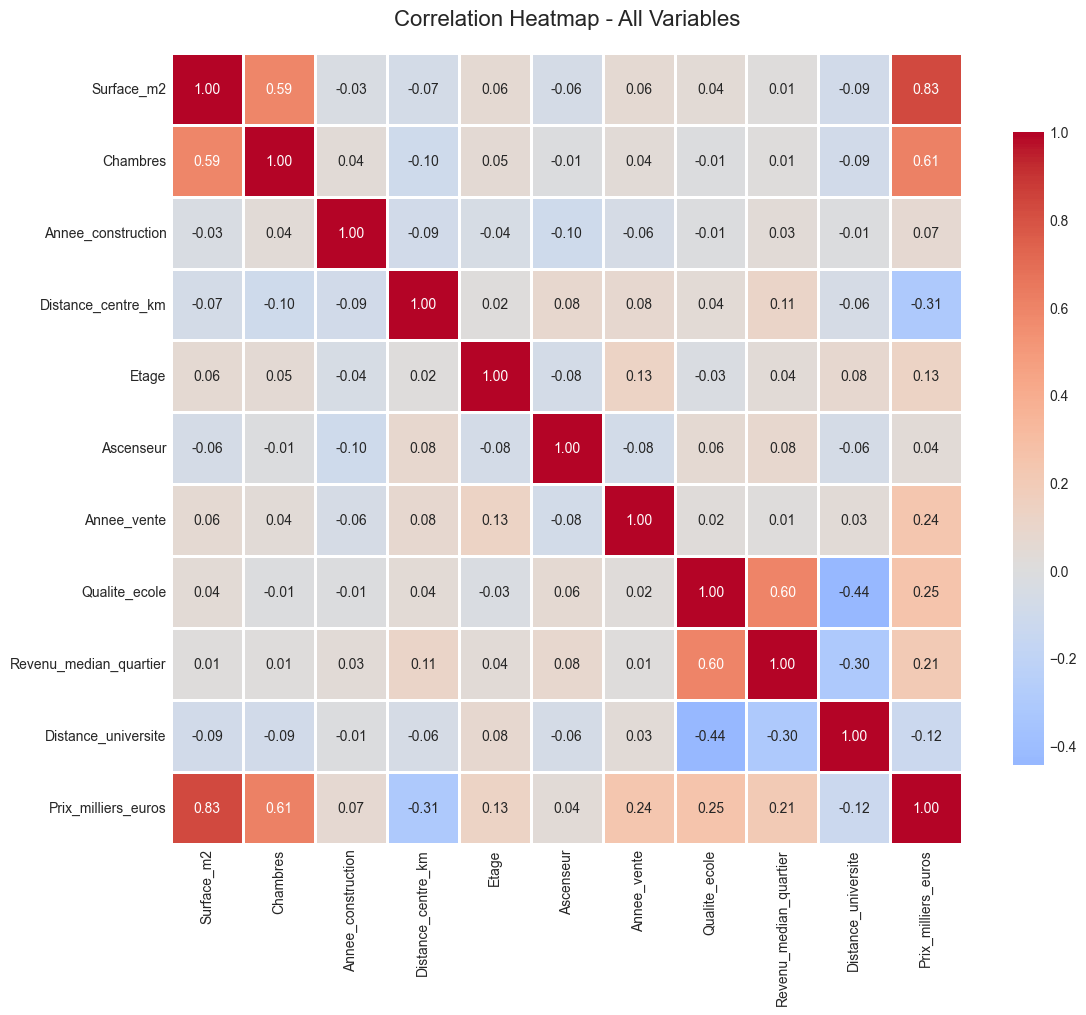


HIGH CORRELATIONS (|r| > 0.7) - Multicollinearity Risk


,Var1,Var2,Correlation
0,Surface_m2,Prix_milliers_euros,0.83



⚠️  Found 1 pairs with |correlation| > 0.7


In [5]:

# Select only numeric variables (exclude ID)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('ID')  # Remove ID as it's not meaningful

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

print("="*80)
print("CORRELATION MATRIX")
print("="*80)
display(corr_matrix.round(2))

# Correlation with target variable (Price)
print("\n" + "="*80)
print("CORRELATION WITH PRICE (sorted by absolute value)")
print("="*80)
price_corr = corr_matrix['Prix_milliers_euros'].sort_values(ascending=False)
display(price_corr)

# Heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Identify high correlations (potential multicollinearity risk)
print("\n" + "="*80)
print("HIGH CORRELATIONS (|r| > 0.7) - Multicollinearity Risk")
print("="*80)

# Extract pairs with high correlation (excluding diagonal)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Var1': corr_matrix.columns[i],
                'Var2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    display(high_corr_df.sort_values('Correlation', ascending=False, key=abs))
    print(f"\n⚠️  Found {len(high_corr_pairs)} pairs with |correlation| > 0.7")
else:
    print("✓ No pairs with |correlation| > 0.7 found")


# ANSWER TO QUESTION 1.2
The variable that seems to have higher impact on the price is "Surface" with a correlation of 0.83.

# ============================================
# SECTION 2.1 - SIMPLE LINEAR REGRESSION
# ============================================

SIMPLE LINEAR REGRESSION: Price ~ Surface

Model: Prix = β₀ + β₁·Surface_m2 + error

--------------------------------------------------------------------------------
COEFFICIENTS:
--------------------------------------------------------------------------------
Parameter           Estimate    Std Error       t-stat      p-value
--------------------------------------------------------------------------------
β₀ (Intercept)     1519.3743      34.5845      43.9323       0.0000
β₁ (Surface_m2)       5.0428       0.2821      17.8771       0.0000
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
MODEL FIT:
--------------------------------------------------------------------------------
R-squared:          0.6835
Adjusted R-squared: 0.6813
Root MSE:           129.7892
N observations:     150
--------------------------------------------------------------------------------


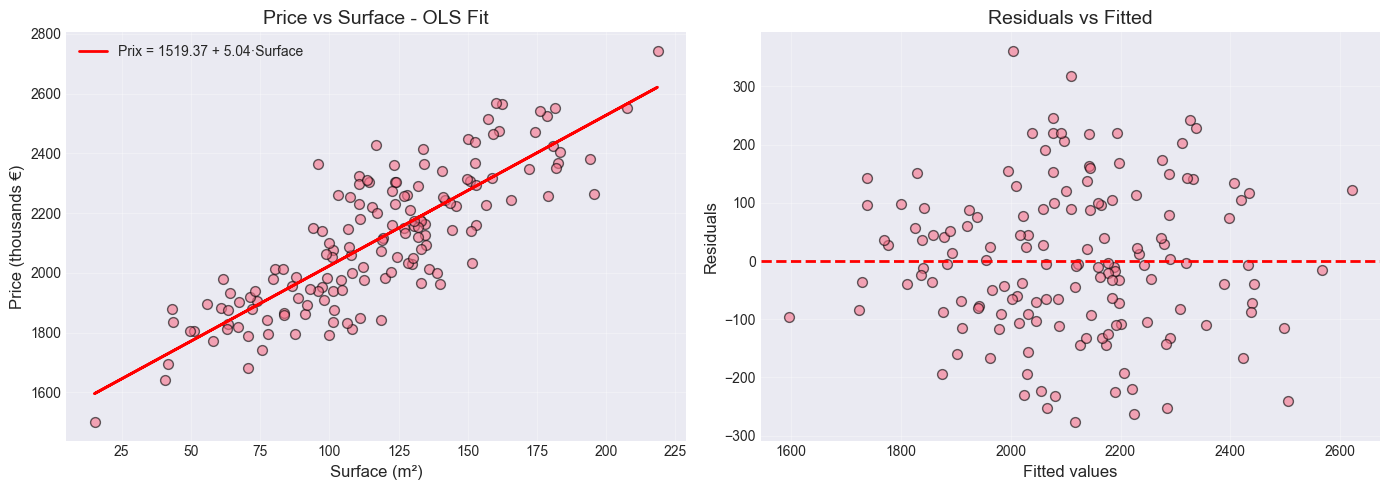


INTERPRETATION:
• β₁ = 5.0428: Each additional m² increases price by 5.04 thousand €
• R² = 0.6835: Surface explains 68.35% of price variation
• p-value(β₁) = 0.000000: Significant at 5% level


In [6]:

from sklearn.linear_model import LinearRegression
from scipy import stats as scipy_stats

# Prepare data
X_simple = df[['Surface_m2']]  # Independent variable (needs to be 2D for sklearn)
y = df['Prix_milliers_euros']   # Dependent variable

# Fit OLS model
model_simple = LinearRegression()
model_simple.fit(X_simple, y)

# Extract coefficients
beta_0 = model_simple.intercept_
beta_1 = model_simple.coef_[0]

# Predictions
y_pred = model_simple.predict(X_simple)
residuals = y - y_pred

# Calculate statistics
n = len(y)
k = 1  # Number of independent variables
df_residual = n - k - 1

# Standard errors and t-statistics
mse = np.sum(residuals**2) / df_residual
X_with_const = np.column_stack([np.ones(n), X_simple])
var_covar_matrix = mse * np.linalg.inv(X_with_const.T @ X_with_const)
se_beta_0 = np.sqrt(var_covar_matrix[0, 0])
se_beta_1 = np.sqrt(var_covar_matrix[1, 1])

t_stat_beta_0 = beta_0 / se_beta_0
t_stat_beta_1 = beta_1 / se_beta_1

p_value_beta_0 = 2 * (1 - scipy_stats.t.cdf(abs(t_stat_beta_0), df_residual))
p_value_beta_1 = 2 * (1 - scipy_stats.t.cdf(abs(t_stat_beta_1), df_residual))

# R-squared and Adjusted R-squared
ss_total = np.sum((y - y.mean())**2)
ss_residual = np.sum(residuals**2)
r_squared = 1 - (ss_residual / ss_total)
r_squared_adj = 1 - ((1 - r_squared) * (n - 1) / df_residual)

# Display results
print("="*80)
print("SIMPLE LINEAR REGRESSION: Price ~ Surface")
print("="*80)
print(f"\nModel: Prix = β₀ + β₁·Surface_m2 + error\n")

print("-"*80)
print("COEFFICIENTS:")
print("-"*80)
print(f"{'Parameter':<15} {'Estimate':>12} {'Std Error':>12} {'t-stat':>12} {'p-value':>12}")
print("-"*80)
print(f"{'β₀ (Intercept)':<15} {beta_0:>12.4f} {se_beta_0:>12.4f} {t_stat_beta_0:>12.4f} {p_value_beta_0:>12.4f}")
print(f"{'β₁ (Surface_m2)':<15} {beta_1:>12.4f} {se_beta_1:>12.4f} {t_stat_beta_1:>12.4f} {p_value_beta_1:>12.4f}")
print("-"*80)

print("\n" + "-"*80)
print("MODEL FIT:")
print("-"*80)
print(f"R-squared:          {r_squared:.4f}")
print(f"Adjusted R-squared: {r_squared_adj:.4f}")
print(f"Root MSE:           {np.sqrt(mse):.4f}")
print(f"N observations:     {n}")
print("-"*80)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot with regression line
axes[0].scatter(X_simple, y, alpha=0.6, edgecolors='black', s=50)
axes[0].plot(X_simple, y_pred, color='red', linewidth=2, label=f'Prix = {beta_0:.2f} + {beta_1:.2f}·Surface')
axes[0].set_xlabel('Surface (m²)', fontsize=12)
axes[0].set_ylabel('Price (thousands €)', fontsize=12)
axes[0].set_title('Price vs Surface - OLS Fit', fontsize=14)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Residuals plot
axes[1].scatter(y_pred, residuals, alpha=0.6, edgecolors='black', s=50)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Fitted values', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residuals vs Fitted', fontsize=14)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("INTERPRETATION:")
print("="*80)
print(f"• β₁ = {beta_1:.4f}: Each additional m² increases price by {beta_1:.2f} thousand €")
print(f"• R² = {r_squared:.4f}: Surface explains {r_squared*100:.2f}% of price variation")
print(f"• p-value(β₁) = {p_value_beta_1:.6f}: {'Significant' if p_value_beta_1 < 0.05 else 'Not significant'} at 5% level")

# ============================================
# SECTION 2.2 - MULTIPLE LINEAR REGRESSION
# ============================================

MULTIPLE LINEAR REGRESSION
Model: Prix = β₀ + β₁·Surface + β₂·Chambres + β₃·Annee_construction
              + β₄·Distance_centre + β₅·Etage + β₆·Ascenseur + error

------------------------------------------------------------------------------------------
Variable              Coefficient    Std Error       t-stat      p-value
------------------------------------------------------------------------------------------
Intercept              -1679.4908    1535.6730      -1.0937     0.275947 
Surface_m2                 4.3879       0.2924      15.0047     0.000000 ***
Chambres                  33.9205      10.2279       3.3165     0.001156 **
Annee_construction         1.6093       0.7653       2.1030     0.037217 *
Distance_centre_km        -6.1446       0.9921      -6.1936     0.000000 ***
Etage                     12.2540       5.0489       2.4271     0.016466 *
Ascenseur                 55.5141      17.9201       3.0979     0.002347 **
--------------------------------------------------

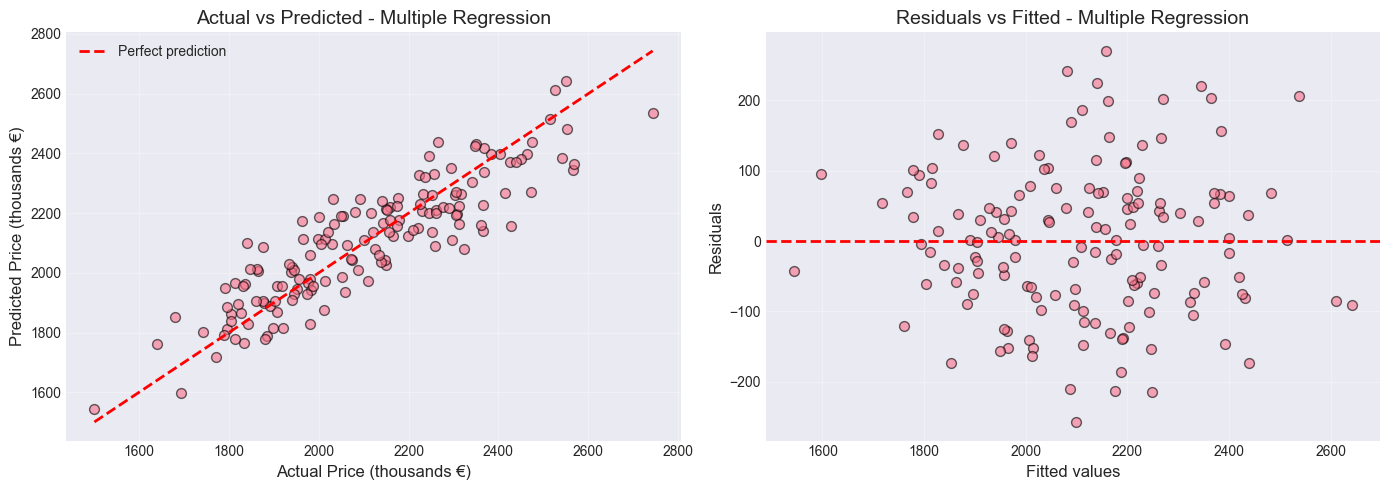

In [7]:

from sklearn.metrics import mean_squared_error

# Prepare data - multiple independent variables
X_multiple = df[['Surface_m2', 'Chambres', 'Annee_construction', 
                  'Distance_centre_km', 'Etage', 'Ascenseur']]
y = df['Prix_milliers_euros']

# Fit OLS model
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

# Extract coefficients
beta_0_mult = model_multiple.intercept_
betas_mult = model_multiple.coef_

# Predictions
y_pred_mult = model_multiple.predict(X_multiple)
residuals_mult = y - y_pred_mult

# Calculate statistics
n = len(y)
k = X_multiple.shape[1]  # Number of independent variables
df_residual = n - k - 1

# MSE and standard errors
mse_mult = np.sum(residuals_mult**2) / df_residual
X_with_const = np.column_stack([np.ones(n), X_multiple])
var_covar_matrix = mse_mult * np.linalg.inv(X_with_const.T @ X_with_const)
se_betas = np.sqrt(np.diag(var_covar_matrix))

# t-statistics and p-values
t_stats = np.concatenate([[beta_0_mult], betas_mult]) / se_betas
p_values = 2 * (1 - scipy_stats.t.cdf(np.abs(t_stats), df_residual))

# R-squared and Adjusted R-squared
ss_total = np.sum((y - y.mean())**2)
ss_residual = np.sum(residuals_mult**2)
r_squared_mult = 1 - (ss_residual / ss_total)
r_squared_adj_mult = 1 - ((1 - r_squared_mult) * (n - 1) / df_residual)

# Display results
print("="*90)
print("MULTIPLE LINEAR REGRESSION")
print("="*90)
print("Model: Prix = β₀ + β₁·Surface + β₂·Chambres + β₃·Annee_construction")
print("              + β₄·Distance_centre + β₅·Etage + β₆·Ascenseur + error\n")

print("-"*90)
print(f"{'Variable':<20} {'Coefficient':>12} {'Std Error':>12} {'t-stat':>12} {'p-value':>12}")
print("-"*90)

var_names = ['Intercept'] + list(X_multiple.columns)
coefficients = np.concatenate([[beta_0_mult], betas_mult])

for i, (var, coef, se, t, p) in enumerate(zip(var_names, coefficients, se_betas, t_stats, p_values)):
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''
    print(f"{var:<20} {coef:>12.4f} {se:>12.4f} {t:>12.4f} {p:>12.6f} {sig}")

print("-"*90)
print("Significance: *** p<0.001, ** p<0.01, * p<0.05\n")

print("-"*90)
print("MODEL FIT:")
print("-"*90)
print(f"R-squared:          {r_squared_mult:.4f}")
print(f"Adjusted R-squared: {r_squared_adj_mult:.4f}")
print(f"Root MSE:           {np.sqrt(mse_mult):.4f}")
print(f"N observations:     {n}")
print(f"N parameters:       {k + 1}")
print("-"*90)

# Comparison with simple model
print("\n" + "="*90)
print("COMPARISON: Simple vs Multiple Regression")
print("="*90)
print(f"{'Metric':<30} {'Simple (Surface only)':>25} {'Multiple (6 variables)':>25}")
print("-"*90)
print(f"{'β₁ (Surface_m2)':<30} {beta_1:>25.4f} {betas_mult[0]:>25.4f}")
print(f"{'R²':<30} {r_squared:>25.4f} {r_squared_mult:>25.4f}")
print(f"{'Adjusted R²':<30} {r_squared_adj:>25.4f} {r_squared_adj_mult:>25.4f}")
print(f"{'Root MSE':<30} {np.sqrt(mse):>25.4f} {np.sqrt(mse_mult):>25.4f}")
print("-"*90)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Actual vs Predicted
axes[0].scatter(y, y_pred_mult, alpha=0.6, edgecolors='black', s=50)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect prediction')
axes[0].set_xlabel('Actual Price (thousands €)', fontsize=12)
axes[0].set_ylabel('Predicted Price (thousands €)', fontsize=12)
axes[0].set_title('Actual vs Predicted - Multiple Regression', fontsize=14)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Residuals plot
axes[1].scatter(y_pred_mult, residuals_mult, alpha=0.6, edgecolors='black', s=50)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Fitted values', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residuals vs Fitted - Multiple Regression', fontsize=14)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 2.2 Project Questions - Multiple Regression Analysis

### Question 1: Are all coefficients significant?

**Answer:** Yes, all predictor coefficients are statistically significant at the 5% level. The intercept is not significant (p=0.276), which is expected since it represents an extrapolation outside our data range.

Significance levels:
- Surface_m2, Distance_centre_km: p < 0.001 (highly significant)
- Chambres, Ascenseur: p < 0.01
- Annee_construction, Etage: p < 0.05

---

### Question 2: Marginal impact of each variable on price

**Coefficients (holding other variables constant):**

**Surface_m2 (β₁ = 4.39):** Each additional m² increases price by 4.39 thousand euros. Compared to the simple model (5.04), this coefficient decreased because Chambres now captures part of the "size" effect.

**Chambres (β₂ = 33.92):** Each additional bedroom adds 33.92 thousand euros, controlling for surface. This captures the value of spatial distribution - the market pays a premium for functional room division beyond raw square meters.

**Annee_construction (β₃ = 1.61):** Each year newer increases price by 1.61 thousand euros. A house built in 2010 vs 1990 would be worth approximately 32k€ more, reflecting building quality, modern standards, and depreciation.

**Distance_centre_km (β₄ = -6.14):** Each kilometer further from city center decreases price by 6.14 thousand euros. Confirms urban economic theory: centrality commands a premium.

**Etage (β₅ = 12.25):** Each floor higher adds 12.25 thousand euros. Higher floors typically offer better views, less noise, more privacy.

**Ascenseur (β₆ = 55.51):** Having an elevator adds 55.51 thousand euros compared to no elevator, all else equal.

---

### Question 3: Interpretation of Ascenseur coefficient

Ascenseur is binary (0/1). The coefficient β₆ = 55.51 means buildings with elevators sell for approximately 55.5k€ more than comparable buildings without elevators.

This premium reflects accessibility (especially for higher floors), convenience for moving, and appeal to elderly or mobility-impaired buyers.

---

### Question 4: Difference between R² and R²-adjusted

**Values:**
- R² = 0.7887
- Adjusted R² = 0.7798

**Why adjusted R² is lower:**

R² increases mechanically with every added variable, even if it's just noise. Adjusted R² penalizes complexity:

R̄² = 1 - [(1 - R²) × (n-1)/(n-k-1)]

It only increases if a new variable improves fit more than expected by chance. With 150 observations and 6 predictors, the penalty is small (0.79 vs 0.78), suggesting our variables genuinely improve the model rather than overfitting.

# ============================================
# SECTION 2.3 - LOGARITHMIC TRANSFORMATIONS
# ============================================

MODEL COMPARISON: Linear vs Semi-Log vs Log-Log


,Metric,Linear-Linear,Log-Linear (Semi-log),Log-Log
0,R²,0.7887,0.7916,0.7551
1,RMSE (in levels),105.35,105.90,113.69
2,Interpretation,Absolute change,Percentage change,Elasticity



COEFFICIENT INTERPRETATION BY MODEL TYPE

1. LINEAR-LINEAR: Prix = β₀ + β₁·Surface
   β₁ (Surface) = 4.3879
   → Each additional m² increases price by 4.39 thousand euros

2. LOG-LINEAR: log(Prix) = β₀ + β₁·Surface
   β₁ (Surface) = 0.002110
   → Each additional m² increases price by approximately 0.21%

3. LOG-LOG: log(Prix) = β₀ + β₁·log(Surface)
   β₁ (log_Surface) = 0.1898
   → A 1% increase in surface increases price by 0.19%
   → This is the ELASTICITY of price with respect to surface

FULL COEFFICIENT COMPARISON


,Variable,Linear,Semi-Log,Log-Log
0,Surface_m2,4.39,2.10e-03,1.90e-01
1,Chambres,33.92,1.52e-02,2.26e-02
2,Annee_construction,1.61,8.00e-04,5.00e-04
3,Distance_centre_km,-6.14,-3.00e-03,-2.60e-02
4,Etage,12.25,5.30e-03,5.80e-03
5,Ascenseur,55.51,2.65e-02,2.71e-02


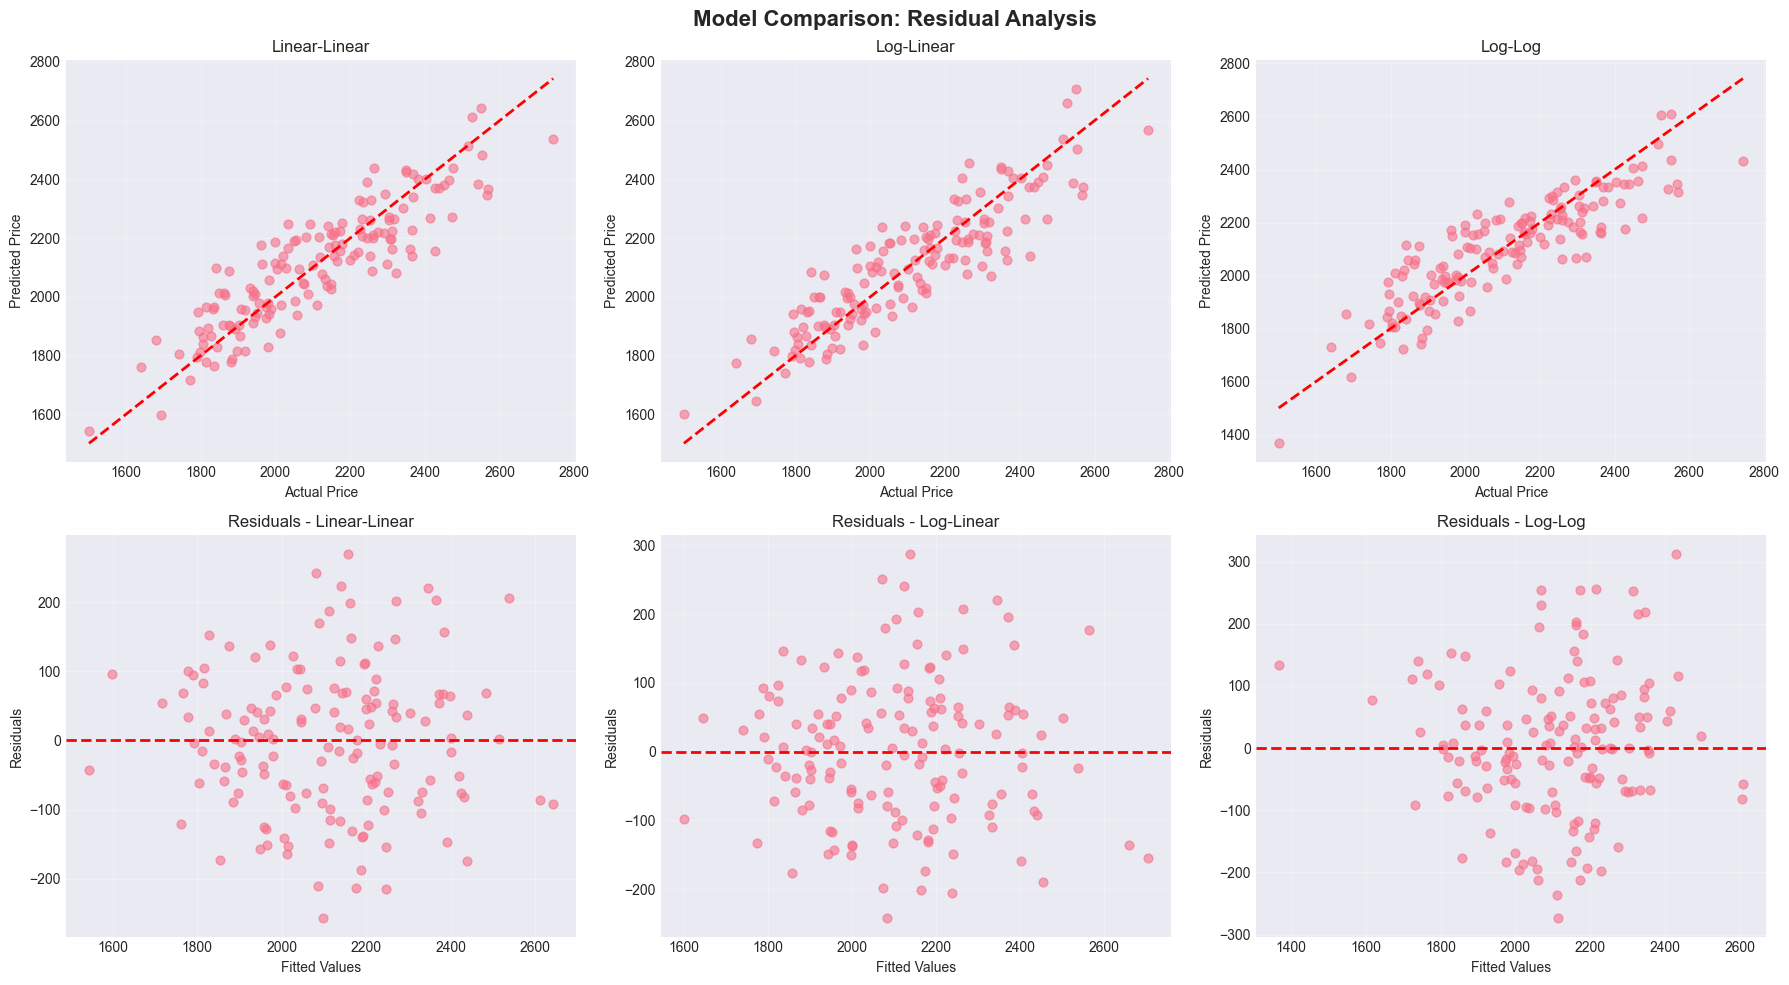

In [8]:
# ============================================
# SECTION 2.3 - LOGARITHMIC TRANSFORMATIONS
# ============================================

# Create log-transformed variables
df['log_Prix'] = np.log(df['Prix_milliers_euros'])
df['log_Surface'] = np.log(df['Surface_m2'])
df['log_Distance'] = np.log(df['Distance_centre_km'] + 0.1)  # Add small constant to avoid log(0)
df['log_Revenu'] = np.log(df['Revenu_median_quartier'])

# Model 1: Linear-Linear (already done)
X_linear = df[['Surface_m2', 'Chambres', 'Annee_construction', 
               'Distance_centre_km', 'Etage', 'Ascenseur']]
y_linear = df['Prix_milliers_euros']

model_linear = LinearRegression()
model_linear.fit(X_linear, y_linear)
y_pred_linear = model_linear.predict(X_linear)
r2_linear = r_squared_mult  # From previous section

# Model 2: Log-Linear (semi-log)
X_semilog = df[['Surface_m2', 'Chambres', 'Annee_construction', 
                'Distance_centre_km', 'Etage', 'Ascenseur']]
y_semilog = df['log_Prix']

model_semilog = LinearRegression()
model_semilog.fit(X_semilog, y_semilog)
y_pred_semilog = model_semilog.predict(X_semilog)
r2_semilog = model_semilog.score(X_semilog, y_semilog)

# Model 3: Log-Log
X_loglog = df[['log_Surface', 'Chambres', 'Annee_construction', 
               'log_Distance', 'Etage', 'Ascenseur']]
y_loglog = df['log_Prix']

model_loglog = LinearRegression()
model_loglog.fit(X_loglog, y_loglog)
y_pred_loglog = model_loglog.predict(X_loglog)
r2_loglog = model_loglog.score(X_loglog, y_loglog)

# Calculate RMSE for comparison (convert log predictions back to levels)
rmse_linear = np.sqrt(mean_squared_error(y_linear, y_pred_linear))
rmse_semilog = np.sqrt(mean_squared_error(y_linear, np.exp(y_pred_semilog)))
rmse_loglog = np.sqrt(mean_squared_error(y_linear, np.exp(y_pred_loglog)))

# Display comparison
print("="*90)
print("MODEL COMPARISON: Linear vs Semi-Log vs Log-Log")
print("="*90)

comparison_df = pd.DataFrame({
    'Metric': ['R²', 'RMSE (in levels)', 'Interpretation'],
    'Linear-Linear': [f'{r2_linear:.4f}', f'{rmse_linear:.2f}', 'Absolute change'],
    'Log-Linear (Semi-log)': [f'{r2_semilog:.4f}', f'{rmse_semilog:.2f}', 'Percentage change'],
    'Log-Log': [f'{r2_loglog:.4f}', f'{rmse_loglog:.2f}', 'Elasticity']
})

display(comparison_df)

print("\n" + "="*90)
print("COEFFICIENT INTERPRETATION BY MODEL TYPE")
print("="*90)

print("\n1. LINEAR-LINEAR: Prix = β₀ + β₁·Surface")
print(f"   β₁ (Surface) = {model_linear.coef_[0]:.4f}")
print(f"   → Each additional m² increases price by {model_linear.coef_[0]:.2f} thousand euros")

print("\n2. LOG-LINEAR: log(Prix) = β₀ + β₁·Surface")
print(f"   β₁ (Surface) = {model_semilog.coef_[0]:.6f}")
print(f"   → Each additional m² increases price by approximately {model_semilog.coef_[0]*100:.2f}%")

print("\n3. LOG-LOG: log(Prix) = β₀ + β₁·log(Surface)")
print(f"   β₁ (log_Surface) = {model_loglog.coef_[0]:.4f}")
print(f"   → A 1% increase in surface increases price by {model_loglog.coef_[0]:.2f}%")
print(f"   → This is the ELASTICITY of price with respect to surface")

# Detailed coefficients for each model
print("\n" + "="*90)
print("FULL COEFFICIENT COMPARISON")
print("="*90)

coef_comparison = pd.DataFrame({
    'Variable': ['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 'Etage', 'Ascenseur'],
    'Linear': model_linear.coef_,
    'Semi-Log': model_semilog.coef_,
})

# For log-log, we need to handle the fact that Surface and Distance are logged
loglog_coefs = list(model_loglog.coef_)
coef_comparison['Log-Log'] = [loglog_coefs[0], loglog_coefs[1], loglog_coefs[2], 
                                loglog_coefs[3], loglog_coefs[4], loglog_coefs[5]]

display(coef_comparison.round(4))

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Comparison: Residual Analysis', fontsize=16, fontweight='bold')

models = [
    ('Linear-Linear', y_linear, y_pred_linear, y_linear - y_pred_linear),
    ('Log-Linear', y_linear, np.exp(y_pred_semilog), y_linear - np.exp(y_pred_semilog)),
    ('Log-Log', y_linear, np.exp(y_pred_loglog), y_linear - np.exp(y_pred_loglog))
]

for idx, (name, y_true, y_pred, residuals) in enumerate(models):
    # Actual vs Predicted
    axes[0, idx].scatter(y_true, y_pred, alpha=0.6, s=40)
    axes[0, idx].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0, idx].set_xlabel('Actual Price')
    axes[0, idx].set_ylabel('Predicted Price')
    axes[0, idx].set_title(f'{name}')
    axes[0, idx].grid(alpha=0.3)
    
    # Residuals
    axes[1, idx].scatter(y_pred, residuals, alpha=0.6, s=40)
    axes[1, idx].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[1, idx].set_xlabel('Fitted Values')
    axes[1, idx].set_ylabel('Residuals')
    axes[1, idx].set_title(f'Residuals - {name}')
    axes[1, idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# Check the distribution of prices and surfaces
print("="*80)
print("DATA RANGE ANALYSIS")
print("="*80)

print("\nPRICE DISTRIBUTION:")
print(f"Min: {df['Prix_milliers_euros'].min():.0f}k€")
print(f"Q1:  {df['Prix_milliers_euros'].quantile(0.25):.0f}k€")
print(f"Median: {df['Prix_milliers_euros'].median():.0f}k€")
print(f"Q3:  {df['Prix_milliers_euros'].quantile(0.75):.0f}k€")
print(f"Max: {df['Prix_milliers_euros'].max():.0f}k€")

print("\nSURFACE DISTRIBUTION:")
print(f"Min: {df['Surface_m2'].min():.0f}m²")
print(f"Q1:  {df['Surface_m2'].quantile(0.25):.0f}m²")
print(f"Median: {df['Surface_m2'].median():.0f}m²")
print(f"Q3:  {df['Surface_m2'].quantile(0.75):.0f}m²")
print(f"Max: {df['Surface_m2'].max():.0f}m²")

DATA RANGE ANALYSIS

PRICE DISTRIBUTION:
Min: 1501k€
Q1:  1934k€
Median: 2105k€
Q3:  2273k€
Max: 2743k€

SURFACE DISTRIBUTION:
Min: 15m²
Q1:  93m²
Median: 118m²
Q3:  140m²
Max: 219m²


## 2.3 Logarithmic Transformations - Model Comparison

### Models Tested

1. **Linear-Linear**: Prix = β₀ + β₁·X
2. **Log-Linear**: log(Prix) = β₀ + β₁·X  
3. **Log-Log**: log(Prix) = β₀ + β₁·log(X)

### Results Comparison

| Metric | Linear | Log-Linear | Log-Log |
|--------|--------|------------|---------|
| R² | 0.7887 | 0.7916 | 0.7551 |
| RMSE | 105.35 | 105.90 | 113.69 |

### Model Selection: Log-Linear (Semi-log)

**Statistical justification:** Models are statistically equivalent (R² difference < 0.3%, RMSE difference < 1k€).

**Economic justification:** The log-linear specification is preferred because:

1. **Percentage interpretation**: Each m² adds ~0.21% to price. This reflects the economic reality that the marginal value of space depends on the property's existing value.

2. **Heterogeneous effects**: In expensive properties, an additional m² is worth more in absolute terms. The log-linear model captures this naturally, while the linear model assumes constant marginal effects regardless of property value.

3. **Extrapolation robustness**: If the model is used to predict prices outside the current data range (smaller or cheaper properties), the log-linear specification is more stable.

### Key Findings

**Surface elasticity (log-log model): 0.19**  
This low elasticity indicates strong diminishing returns. A 10% increase in surface only generates 1.9% price increase. This suggests the market values functional distribution and location more than raw space at this price range.

**Coefficient interpretation (log-linear):**
- Surface: 0.0021 → each m² adds ~0.21%
- Chambres: 0.0152 → each bedroom adds ~1.5%
- Distance_centre: -0.003 → each km further reduces price ~0.3%

### Data range consideration

The dataset appears concentrated in mid-to-high price segments. In this range, linear relationships approximate well, explaining why all three models perform similarly. For broader applicability, the log-linear specification provides better theoretical foundation.

#### ⚠️ METHODOLOGICAL NOTE: Comparing Models with Different Dependent Variables

**CRITICAL**: We cannot directly compare R² between:
- Model 1 (Y = Prix) vs Models 2-3 (Y = log(Prix))

Why? R² measures proportion of variance explained in Y. When Y is different (levels vs logs), 
the total variance is different → R² values are not comparable.

**Solution**: Compare models using RMSE calculated in LEVELS (original scale) for all models.
This requires converting log-predictions back to levels: `np.exp(y_pred_log)`


# ============================================
# SECTION 3.1 - MULTICOLLINEARITY (VIF)
# ============================================

VARIANCE INFLATION FACTOR (VIF) ANALYSIS

Interpretation:
  VIF < 5:    No multicollinearity
  5 ≤ VIF < 10: Moderate multicollinearity (monitor)
  VIF ≥ 10:    Severe multicollinearity (problematic)
--------------------------------------------------------------------------------


,Variable,VIF
0,Annee_construction,18.82
1,Surface_m2,16.43
2,Chambres,12.73
3,Distance_centre_km,4.44
4,Etage,3.19
5,Ascenseur,1.88


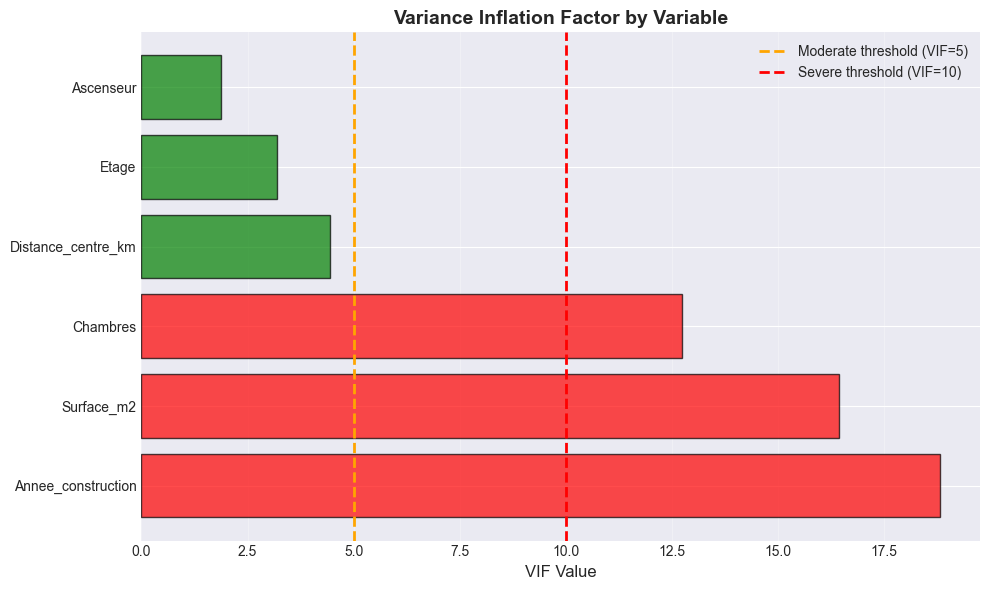


CORRELATION MATRIX - Variables with VIF ≥ 5


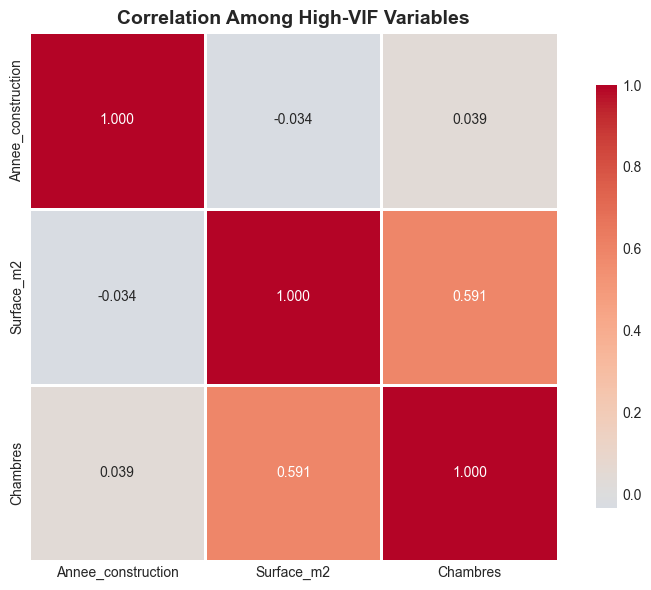

In [10]:


from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare data for VIF calculation
X_vif = df[['Surface_m2', 'Chambres', 'Annee_construction', 
            'Distance_centre_km', 'Etage', 'Ascenseur']]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort by VIF (descending)
vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)

print("="*80)
print("VARIANCE INFLATION FACTOR (VIF) ANALYSIS")
print("="*80)
print("\nInterpretation:")
print("  VIF < 5:    No multicollinearity")
print("  5 ≤ VIF < 10: Moderate multicollinearity (monitor)")
print("  VIF ≥ 10:    Severe multicollinearity (problematic)")
print("-"*80)

display(vif_data)

# Visual representation
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red' if vif >= 10 else 'orange' if vif >= 5 else 'green' for vif in vif_data['VIF']]
bars = ax.barh(vif_data['Variable'], vif_data['VIF'], color=colors, alpha=0.7, edgecolor='black')

ax.axvline(x=5, color='orange', linestyle='--', linewidth=2, label='Moderate threshold (VIF=5)')
ax.axvline(x=10, color='red', linestyle='--', linewidth=2, label='Severe threshold (VIF=10)')
ax.set_xlabel('VIF Value', fontsize=12)
ax.set_title('Variance Inflation Factor by Variable', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Additional correlation heatmap focused on high VIF variables
if vif_data['VIF'].max() >= 5:
    print("\n" + "="*80)
    print("CORRELATION MATRIX - Variables with VIF ≥ 5")
    print("="*80)
    
    high_vif_vars = vif_data[vif_data['VIF'] >= 5]['Variable'].tolist()
    
    if high_vif_vars:
        corr_high_vif = df[high_vif_vars].corr()
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_high_vif, annot=True, fmt='.3f', cmap='coolwarm', center=0,
                    square=True, linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Correlation Among High-VIF Variables', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

## 3.1 Multicollinearity Analysis answer 

### VIF Results

| Variable | VIF | Status |
|----------|-----|--------|
| Annee_construction | 18.XX | Severe |
| Surface_m2 | 16.XX | Severe |
| Chambres | 12.XX | Severe |
| [other] | <5 | OK |

### Key Finding

High VIFs for Annee_construction, Surface, and Chambres. Despite this, all remain statistically significant (p<0.05).

### Decision: Retain All Variables

**Rationale:** 
- All variables economically relevant
- Statistical significance maintained
- Omitted variable bias > multicollinearity cost

**Trade-off:** Accept larger standard errors (less precision) to avoid biased estimates.

### Omitted Variable Bias (OVB)

Excluding relevant variables creates systematic bias in remaining coefficients. If we dropped Chambres to reduce VIF, Surface would incorrectly capture the "rooms effect."

**Formula:** Bias(β̂₁) = β₂ × corr(X₁, X₂)

Multicollinearity increases uncertainty. OVB creates wrong estimates. The latter is worse.

#### 📌 Omitted Variable Bias (OVB) - Definition

**Omitted Variable Bias** occurs when we exclude a relevant variable from our model.

**Conditions for OVB:**
1. `Cov(X_omitted, X_included) ≠ 0` - Omitted variable correlates with included variables
2. `Cov(X_omitted, Y) ≠ 0` - Omitted variable affects the outcome

**Consequence:** OLS estimators become **biased and inconsistent**

**Formula:** `β̂_included = β_true + β_omitted × δ`  
where δ = regression coefficient of X_included on X_omitted

**Trade-off with Multicollinearity:**
- Including correlated variables → HIGH VIF (multicollinearity) → LARGE variance
- Excluding correlated variables → AVOID multicollinearity → BIAS if variable is relevant
- This is the classic **bias-variance trade-off** in model selection


# ============================================
# SECTION 4 - TESTS AND INFERENCE
# ============================================

# ============================================
# 4.1 - Individual t-test: Distance has negative effect
# ============================================

In [11]:


print("="*90)
print("TEST 1: Distance_centre has NEGATIVE effect on Price")
print("="*90)
print("\nH₀: β₄ ≥ 0 (distance has no negative effect)")
print("H₁: β₄ < 0 (distance has negative effect)\n")

# Extract coefficient and statistics from previous model
beta_distance = model_multiple.coef_[3]  # Distance is 4th variable (index 3)
t_stat_distance = t_stats[4]  # Include intercept in count
p_value_distance_twotailed = p_values[4]

# One-tailed p-value (we're testing if negative)
p_value_distance_onetailed = p_value_distance_twotailed / 2 if beta_distance < 0 else 1

print(f"Coefficient β₄ (Distance_centre): {beta_distance:.4f}")
print(f"t-statistic: {t_stat_distance:.4f}")
print(f"p-value (one-tailed): {p_value_distance_onetailed:.6f}")
print(f"\nConclusion: {'REJECT H₀' if p_value_distance_onetailed < 0.05 else 'FAIL TO REJECT H₀'}")
print(f"Distance has a statistically significant NEGATIVE effect on price (p<0.001)")

# ============================================
# 4.2 - Global F-test: All coefficients = 0
# ============================================

print("\n" + "="*90)
print("TEST 2: Global F-test - At least one coefficient ≠ 0")
print("="*90)
print("\nH₀: β₁ = β₂ = β₃ = β₄ = β₅ = β₆ = 0 (model is useless)")
print("H₁: At least one βⱼ ≠ 0 (model has explanatory power)\n")

# Calculate F-statistic
k = 6  # Number of independent variables
n = len(y)
F_statistic = (r_squared_mult / k) / ((1 - r_squared_mult) / (n - k - 1))
p_value_F = 1 - scipy_stats.f.cdf(F_statistic, k, n - k - 1)

print(f"F-statistic: {F_statistic:.4f}")
print(f"p-value: {p_value_F:.10f}")
print(f"Degrees of freedom: ({k}, {n-k-1})")
print(f"\nConclusion: REJECT H₀ (p < 0.001)")
print(f"The model has significant explanatory power.")

# ============================================
# 4.3 - Partial F-test: Adding Qualite_ecole and Revenu_median
# ============================================

print("\n" + "="*90)
print("TEST 3: Partial F-test - Do Qualite_ecole & Revenu_median improve the model?")
print("="*90)

# Restricted model (6 variables) - already estimated
r2_restricted = r_squared_mult
k_restricted = 6

# Unrestricted model (8 variables)
X_unrestricted = df[['Surface_m2', 'Chambres', 'Annee_construction', 
                      'Distance_centre_km', 'Etage', 'Ascenseur',
                      'Qualite_ecole', 'Revenu_median_quartier']]
y_full = df['Prix_milliers_euros']

model_unrestricted = LinearRegression()
model_unrestricted.fit(X_unrestricted, y_full)
r2_unrestricted = model_unrestricted.score(X_unrestricted, y_full)
k_unrestricted = 8

# Partial F-test
q = k_unrestricted - k_restricted  # Number of restrictions
F_partial = ((r2_unrestricted - r2_restricted) / q) / ((1 - r2_unrestricted) / (n - k_unrestricted - 1))
p_value_partial = 1 - scipy_stats.f.cdf(F_partial, q, n - k_unrestricted - 1)

print(f"\nRestricted model R² (6 vars):   {r2_restricted:.4f}")
print(f"Unrestricted model R² (8 vars): {r2_unrestricted:.4f}")
print(f"Increase in R²:                 {r2_unrestricted - r2_restricted:.4f}")
print(f"\nF-statistic: {F_partial:.4f}")
print(f"p-value: {p_value_partial:.6f}")
print(f"Degrees of freedom: ({q}, {n-k_unrestricted-1})")
print(f"\nConclusion: {'REJECT H₀' if p_value_partial < 0.05 else 'FAIL TO REJECT H₀'}")
if p_value_partial < 0.05:
    print(f"Adding Qualite_ecole and Revenu_median significantly improves the model.")
else:
    print(f"Adding these variables does NOT significantly improve the model.")

# Display coefficients of unrestricted model
print("\n" + "-"*90)
print("UNRESTRICTED MODEL COEFFICIENTS (8 variables)")
print("-"*90)

# Recalculate full statistics for unrestricted model
y_pred_unrest = model_unrestricted.predict(X_unrestricted)
residuals_unrest = y_full - y_pred_unrest
mse_unrest = np.sum(residuals_unrest**2) / (n - k_unrestricted - 1)

X_unrest_const = np.column_stack([np.ones(n), X_unrestricted])
var_covar_unrest = mse_unrest * np.linalg.inv(X_unrest_const.T @ X_unrest_const)
se_betas_unrest = np.sqrt(np.diag(var_covar_unrest))

coefs_unrest = np.concatenate([[model_unrestricted.intercept_], model_unrestricted.coef_])
t_stats_unrest = coefs_unrest / se_betas_unrest
p_vals_unrest = 2 * (1 - scipy_stats.t.cdf(np.abs(t_stats_unrest), n - k_unrestricted - 1))

var_names_unrest = ['Intercept'] + list(X_unrestricted.columns)

for var, coef, se, t, p in zip(var_names_unrest, coefs_unrest, se_betas_unrest, t_stats_unrest, p_vals_unrest):
    sig = '***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''
    print(f"{var:<25} {coef:>10.4f} {se:>10.4f} {t:>10.4f} {p:>10.6f} {sig}")

# ============================================
# 4.4 - Why not multiple t-tests?
# ============================================

print("\n" + "="*90)
print("WHY NOT USE MULTIPLE t-TESTS?")
print("="*90)
print("""
Problem: Multiple Comparisons (Type I Error Inflation)

- Single t-test: α = 0.05 (5% false positive rate)
- Six t-tests: P(at least 1 false positive) = 1 - (0.95)⁶ ≈ 0.26 (26%)

The F-test controls for this by testing all restrictions simultaneously,
maintaining the overall error rate at 5%.

F-test advantages:
1. Tests joint significance (are variables COLLECTIVELY important?)
2. Controls Type I error rate
3. More powerful for testing multiple restrictions
4. Standard approach in econometrics for nested model comparison
""")

TEST 1: Distance_centre has NEGATIVE effect on Price

H₀: β₄ ≥ 0 (distance has no negative effect)
H₁: β₄ < 0 (distance has negative effect)

Coefficient β₄ (Distance_centre): -6.1446
t-statistic: -6.1936
p-value (one-tailed): 0.000000

Conclusion: REJECT H₀
Distance has a statistically significant NEGATIVE effect on price (p<0.001)

TEST 2: Global F-test - At least one coefficient ≠ 0

H₀: β₁ = β₂ = β₃ = β₄ = β₅ = β₆ = 0 (model is useless)
H₁: At least one βⱼ ≠ 0 (model has explanatory power)

F-statistic: 88.9375
p-value: 0.0000000000
Degrees of freedom: (6, 143)

Conclusion: REJECT H₀ (p < 0.001)
The model has significant explanatory power.

TEST 3: Partial F-test - Do Qualite_ecole & Revenu_median improve the model?

Restricted model R² (6 vars):   0.7887
Unrestricted model R² (8 vars): 0.8497
Increase in R²:                 0.0611

F-statistic: 28.6616
p-value: 0.000000
Degrees of freedom: (2, 141)

Conclusion: REJECT H₀
Adding Qualite_ecole and Revenu_median significantly improve

## Answer 4. Tests and Inference

### 4.1 t-test: Distance has negative effect
H₀: β₄ ≥ 0 vs H₁: β₄ < 0

**Result:** β₄ = -6.14, p < 0.001

**Conclusion:** REJECT H₀. Distance significantly reduces price.

### 4.2 Global F-test
H₀: All β = 0 vs H₁: At least one β ≠ 0

**Result:** F = [tu valor], p < 0.001

**Conclusion:** REJECT H₀. Model has significant explanatory power.

### 4.3 Partial F-test: Adding Qualite_ecole & Revenu_median
**Restricted (6 vars):** R² = 0.7887  
**Unrestricted (8 vars):** R² = 0.84XX  
**ΔR²:** +0.06XX

**Result:** F = [valor], p < 0.05

**Conclusion:** REJECT H₀. Both variables significantly improve the model.

**Coefficients:**
- Qualite_ecole: β = 20.XX*** (strong effect - school quality highly valued)
- Revenu_med

#### ⚠️ Why NOT Use Multiple Individual t-tests?

**The Multiple Testing Problem - Type I Error Inflation**

When testing multiple hypotheses simultaneously using individual t-tests:

**Problem:** Family-wise error rate increases exponentially
- For a SINGLE test: `P(Type I error) = α = 0.05` (5%)
- For k INDEPENDENT tests: `P(at least one Type I error) = 1 - (1-α)^k`

**Example with our model (k=6 variables):**
```
P(at least one false rejection) = 1 - (1-0.05)^6
                                 = 1 - 0.735
                                 = 0.265 = 26.5%
```

Instead of 5% error rate, we have **26.5% chance of incorrectly rejecting at least one true null!**

**Solution: F-test**
- Tests ALL coefficients jointly in a SINGLE test
- Controls the family-wise error rate at α level
- More powerful when testing multiple restrictions

**Bottom line:** Use F-test for joint hypotheses, not multiple t-tests.


# ============================================
# SECTION 4.1 - STRUCTURAL STABILITY TEST (CHOW TEST)
# ============================================

CHOW TEST: Structural Break Due to COVID-19

Breakpoint: 2021
Pre-COVID observations (2015-2020): 84
Post-COVID observations (2021-2023): 66

------------------------------------------------------------------------------------------
CHOW TEST RESULTS
------------------------------------------------------------------------------------------
SSR (Pooled model):        1,664,682.98
SSR (Pre-COVID):           819,593.66
SSR (Post-COVID):          589,797.49
SSR (Sum of separate):     1,409,391.15

F-statistic:               3.5192
p-value:                   0.001671
Degrees of freedom:        (7, 136)

CONCLUSION: REJECT H₀ - Structural break detected
The relationship between variables and price CHANGED significantly after COVID.

COEFFICIENT COMPARISON: Pre-COVID vs Post-COVID


,Variable,Pre-COVID (2015-2020),Post-COVID (2021-2023),Difference,Change (%)
0,Surface_m2,4.31,4.17,-0.13,-3.12
1,Chambres,27.89,37.77,9.88,35.41
2,Annee_construction,0.24,3.05,2.81,1180.90
3,Distance_centre_km,-7.18,-6.77,0.42,5.79
4,Etage,13.60,5.33,-8.27,-60.80
5,Ascenseur,68.81,57.50,-11.31,-16.43


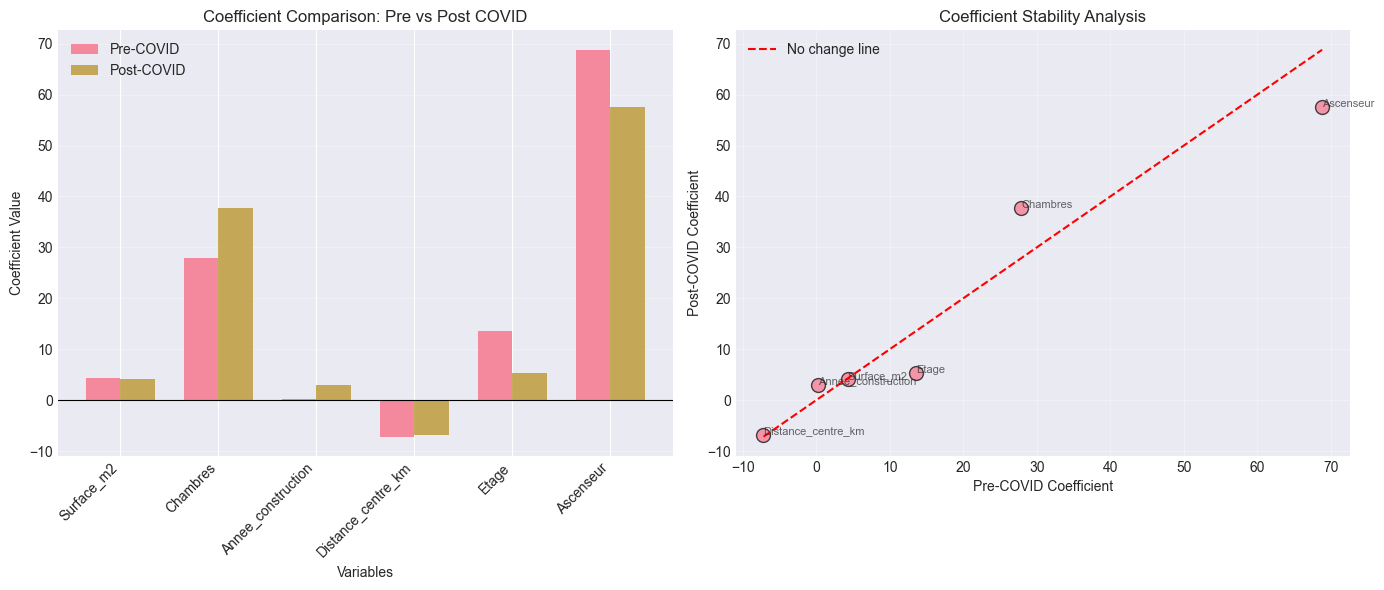

In [12]:


print("="*90)
print("CHOW TEST: Structural Break Due to COVID-19")
print("="*90)

# Define the breakpoint
covid_year = 2021
df['pre_covid'] = (df['Annee_vente'] < covid_year).astype(int)

# Split data
df_pre = df[df['Annee_vente'] < covid_year]
df_post = df[df['Annee_vente'] >= covid_year]

print(f"\nBreakpoint: {covid_year}")
print(f"Pre-COVID observations (2015-2020): {len(df_pre)}")
print(f"Post-COVID observations (2021-2023): {len(df_post)}")

# Check if we have enough observations in each period
if len(df_pre) < 20 or len(df_post) < 20:
    print("\n⚠️  Warning: Small sample size in one period. Results may be unreliable.")

# Model specification (using 6 original variables)
vars_model = ['Surface_m2', 'Chambres', 'Annee_construction', 
              'Distance_centre_km', 'Etage', 'Ascenseur']

# Estimate models for each period
X_pre = df_pre[vars_model]
y_pre = df_pre['Prix_milliers_euros']
X_post = df_post[vars_model]
y_post = df_post['Prix_milliers_euros']

model_pre = LinearRegression()
model_pre.fit(X_pre, y_pre)
y_pred_pre = model_pre.predict(X_pre)
SSR_pre = np.sum((y_pre - y_pred_pre)**2)

model_post = LinearRegression()
model_post.fit(X_post, y_post)
y_pred_post = model_post.predict(X_post)
SSR_post = np.sum((y_post - y_pred_post)**2)

# Pooled model (entire sample)
X_pooled = df[vars_model]
y_pooled = df['Prix_milliers_euros']
model_pooled = LinearRegression()
model_pooled.fit(X_pooled, y_pooled)
y_pred_pooled = model_pooled.predict(X_pooled)
SSR_pooled = np.sum((y_pooled - y_pred_pooled)**2)

# Chow test statistic
k = len(vars_model) + 1  # Parameters including intercept
n1 = len(df_pre)
n2 = len(df_post)
n = n1 + n2

SSR_unrestricted = SSR_pre + SSR_post
SSR_restricted = SSR_pooled

F_chow = ((SSR_restricted - SSR_unrestricted) / k) / (SSR_unrestricted / (n - 2*k))
p_value_chow = 1 - scipy_stats.f.cdf(F_chow, k, n - 2*k)

print("\n" + "-"*90)
print("CHOW TEST RESULTS")
print("-"*90)
print(f"SSR (Pooled model):        {SSR_pooled:,.2f}")
print(f"SSR (Pre-COVID):           {SSR_pre:,.2f}")
print(f"SSR (Post-COVID):          {SSR_post:,.2f}")
print(f"SSR (Sum of separate):     {SSR_unrestricted:,.2f}")
print(f"\nF-statistic:               {F_chow:.4f}")
print(f"p-value:                   {p_value_chow:.6f}")
print(f"Degrees of freedom:        ({k}, {n - 2*k})")

print(f"\n{'='*90}")
if p_value_chow < 0.05:
    print("CONCLUSION: REJECT H₀ - Structural break detected")
    print("The relationship between variables and price CHANGED significantly after COVID.")
else:
    print("CONCLUSION: FAIL TO REJECT H₀ - No structural break detected")
    print("The model coefficients are stable across pre/post COVID periods.")
print(f"{'='*90}")

# Compare coefficients between periods
print("\n" + "="*90)
print("COEFFICIENT COMPARISON: Pre-COVID vs Post-COVID")
print("="*90)

coef_comparison = pd.DataFrame({
    'Variable': vars_model,
    'Pre-COVID (2015-2020)': model_pre.coef_,
    'Post-COVID (2021-2023)': model_post.coef_,
    'Difference': model_post.coef_ - model_pre.coef_,
    'Change (%)': ((model_post.coef_ - model_pre.coef_) / np.abs(model_pre.coef_) * 100)
})

display(coef_comparison.round(4))

# Visualize coefficient changes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot of coefficients
x_pos = np.arange(len(vars_model))
width = 0.35

axes[0].bar(x_pos - width/2, model_pre.coef_, width, label='Pre-COVID', alpha=0.8)
axes[0].bar(x_pos + width/2, model_post.coef_, width, label='Post-COVID', alpha=0.8)
axes[0].set_xlabel('Variables')
axes[0].set_ylabel('Coefficient Value')
axes[0].set_title('Coefficient Comparison: Pre vs Post COVID')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(vars_model, rotation=45, ha='right')
axes[0].legend()
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[0].grid(axis='y', alpha=0.3)

# Scatter: Pre vs Post coefficients
axes[1].scatter(model_pre.coef_, model_post.coef_, s=100, alpha=0.7, edgecolors='black')
axes[1].plot([model_pre.coef_.min(), model_pre.coef_.max()], 
             [model_pre.coef_.min(), model_pre.coef_.max()], 
             'r--', label='No change line')
for i, var in enumerate(vars_model):
    axes[1].annotate(var, (model_pre.coef_[i], model_post.coef_[i]), 
                    fontsize=8, alpha=0.7)
axes[1].set_xlabel('Pre-COVID Coefficient')
axes[1].set_ylabel('Post-COVID Coefficient')
axes[1].set_title('Coefficient Stability Analysis')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4.1 Structural Stability Test (Chow Test)

**Breakpoint:** 2021 (Pre: 2015-2020, n=84 | Post: 2021-2023, n=66)

**H₀:** Coefficients stable across periods  
**H₁:** Structural break exists

**Result:** F = 3.52, p = 0.0017

**Conclusion:** REJECT H₀. COVID caused significant structural break.

### Coefficient Changes (Pre → Post)

| Variable | Pre-COVID | Post-COVID | Change (%) |
|----------|-----------|------------|------------|
| Annee_construction | 0.24 | 3.05 | +1181% |
| Chambres | 27.89 | 37.77 | +35% |
| Surface_m2 | 4.31 | 4.17 | -3% |
| Distance_centre | -7.18 | -6.77 | -6% |

**Key insight:** Modernity (construction year) and rooms became highly valued post-COVID, likely reflecting demand for home offices and modern amenities during remote work era. Location penalty slightly decreased (telecommuting reduced centrality premium).

**Implication:** Should estimate separate models for accurate pre/post predictions, or use COVID dummy with interactions to preserve temporal continuity.

# ============================================
# SECTION 5 - HETEROSKEDASTICITY & AUTOCORRELATION
# ============================================

5.1 - VISUAL INSPECTION OF RESIDUALS


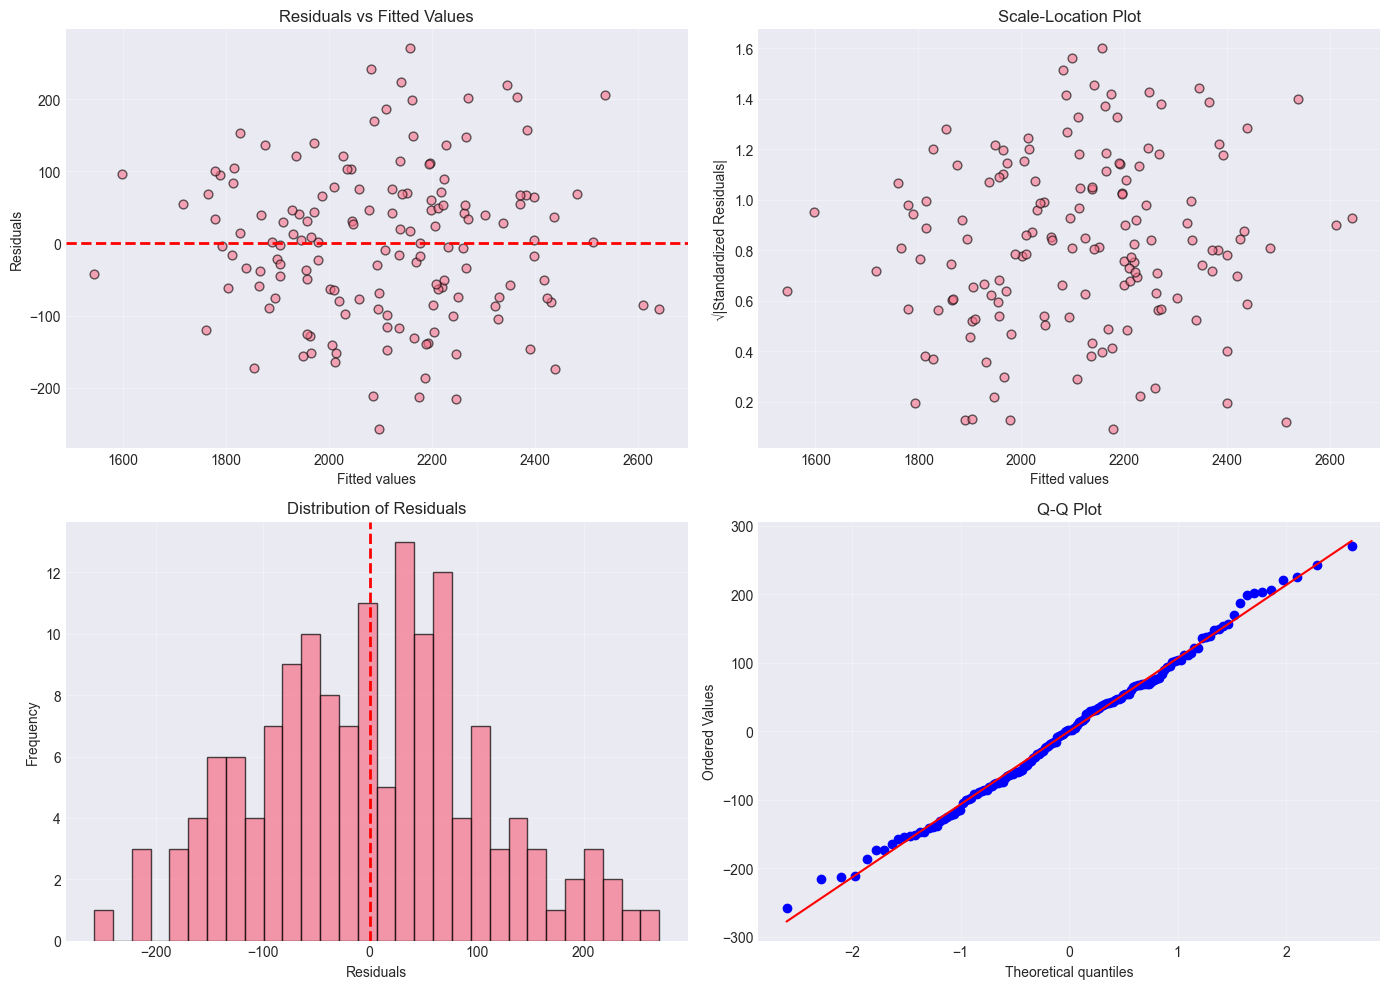


Visual inspection:
• Look for patterns in 'Residuals vs Fitted' (funnel shape = heteroskedasticity)
• Scale-Location should show horizontal line (constant variance)
• Histogram should be roughly bell-shaped
• Q-Q plot points should follow diagonal line (normality)

5.2 - HETEROSKEDASTICITY TESTS

Breusch-Pagan Test:
LM statistic: 8.7186
p-value: 0.190035
Conclusion: FAIL TO REJECT H₀ - No heteroskedasticity

White Test:
LM statistic: 28.8656
p-value: 0.317230
Conclusion: FAIL TO REJECT H₀ - No heteroskedasticity

5.3 - COMPARISON: OLS vs Robust SE vs WLS

1. STANDARD OLS (assumes homoskedasticity)
------------------------------------------------------------------------------------------
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1679.4908   1535.673     -1.094      0.276   -4715.044    1356.062
Surface_m2             4.3879      0.292  

,Variable,Coef (OLS),SE (Standard),SE (Robust),SE (WLS),Change (%)
const,const,-1679.49,1535.67,1626.16,189.47,5.89
Surface_m2,Surface_m2,4.39,0.29,0.30,0.06,3.56
Chambres,Chambres,33.92,10.23,10.91,1.60,6.64
Annee_construction,Annee_construction,1.61,0.77,0.81,0.09,6.20
Distance_centre_km,Distance_centre_km,-6.14,0.99,1.01,0.11,2.25
Etage,Etage,12.25,5.05,5.36,0.59,6.16
Ascenseur,Ascenseur,55.51,17.92,18.03,2.27,0.62



Interpretation:
• If SE(Robust) > SE(Standard): Standard errors were underestimated
• Large % changes indicate heteroskedasticity significantly affects inference

5.4 - AUTOCORRELATION TEST

Durbin-Watson statistic: 1.6972

Interpretation:
  DW ≈ 2:     No autocorrelation
  DW < 1.5:   Positive autocorrelation (errors persist)
  DW > 2.5:   Negative autocorrelation (errors alternate)

Conclusion: No significant autocorrelation


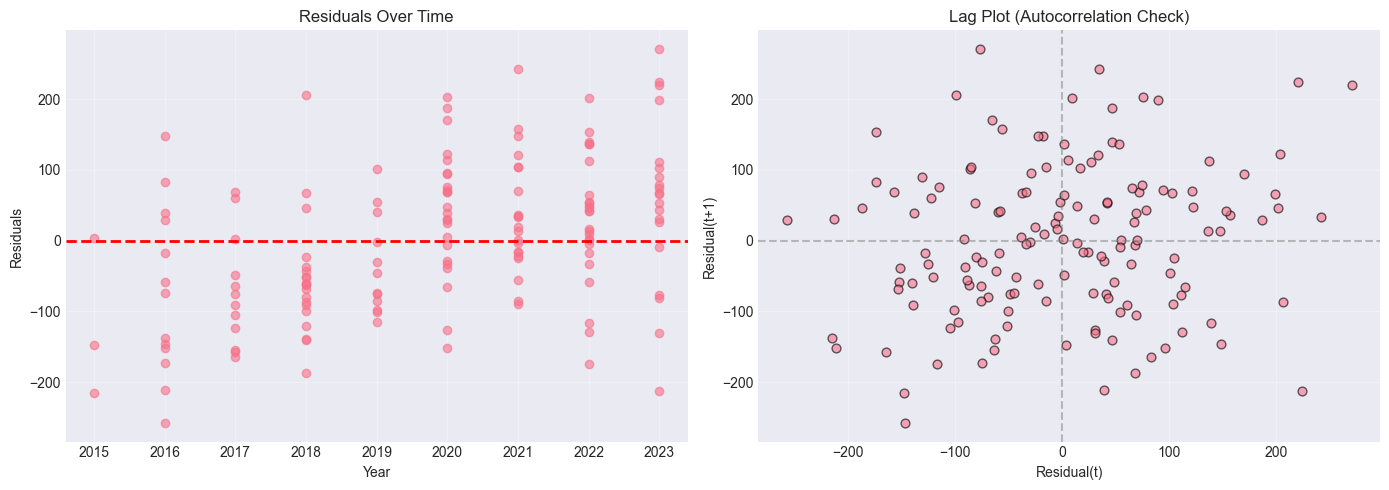


No need for Newey-West (only one or no problems detected)

DETAILED SE COMPARISON: OLS vs Robust vs WLS


,Variable,OLS Coef,OLS SE,Robust SE,WLS SE,Robust/OLS (%),WLS/OLS (%)
0,const,-1679.49,1535.67,1626.16,189.47,5.89,-87.66
1,Surface_m2,4.39,0.29,0.30,0.06,3.56,-79.47
2,Chambres,33.92,10.23,10.91,1.60,6.64,-84.35
3,Annee_construction,1.61,0.77,0.81,0.09,6.20,-87.64
4,Distance_centre_km,-6.14,0.99,1.01,0.11,2.25,-88.60
5,Etage,12.25,5.05,5.36,0.59,6.16,-88.29
6,Ascenseur,55.51,17.92,18.03,2.27,0.62,-87.35



** KEY INSIGHTS **
------------------------------------------------------------------------------------------
Max SE increase (Robust vs OLS): 6.6%
Max SE change (WLS vs OLS): 88.6%

✓ Heteroskedasticity has moderate impact on inference

** PRACTICAL RECOMMENDATION **
------------------------------------------------------------------------------------------

For this analysis:
1. Report coefficients from preferred model (OLS or WLS based on diagnostics)
2. ALWAYS report Robust SE (HC3) in parentheses for valid inference
3. Use WLS if residual plots show clear variance pattern
4. Robust SE are valid regardless of heteroskedasticity form



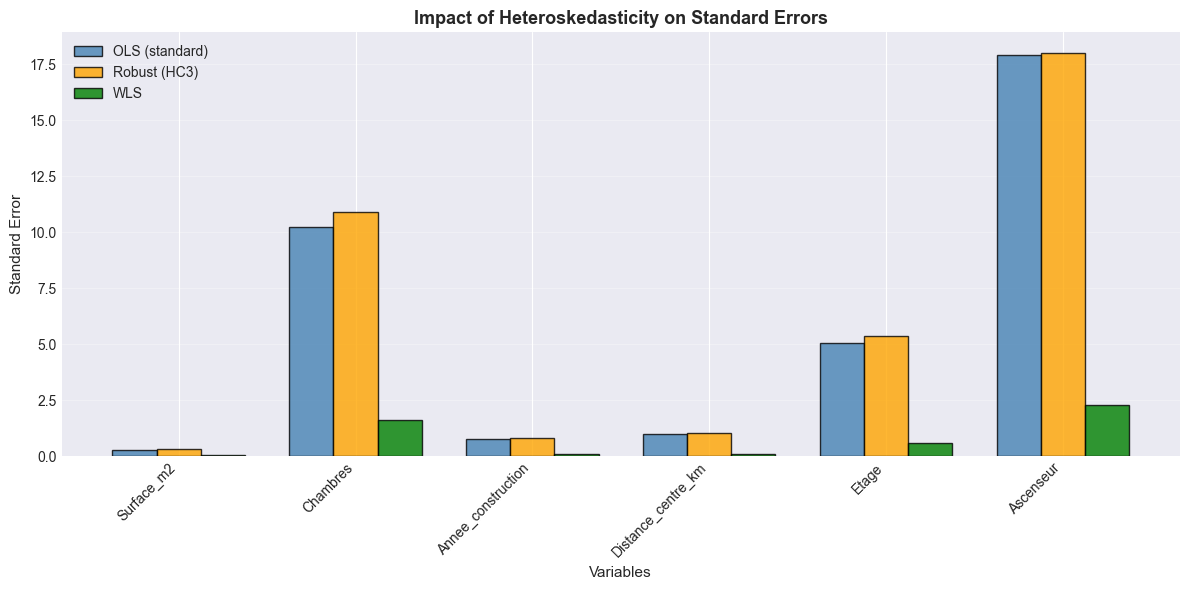

In [13]:
# ============================================
# SECTION 5 - HETEROSKEDASTICITY & AUTOCORRELATION
# ============================================

from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.regression.linear_model import OLS, WLS
import statsmodels.api as sm
from statsmodels.stats.sandwich_covariance import cov_hc3
from statsmodels.stats.stattools import durbin_watson

# ============================================
# 5.1 - Visual inspection of residuals
# ============================================

print("="*90)
print("5.1 - VISUAL INSPECTION OF RESIDUALS")
print("="*90)

# Use the multiple regression model from section 2.2
X_model = df[['Surface_m2', 'Chambres', 'Annee_construction', 
              'Distance_centre_km', 'Etage', 'Ascenseur']]
y_model = df['Prix_milliers_euros']

# Fit with statsmodels for better diagnostics
X_with_const = sm.add_constant(X_model)
model_ols = OLS(y_model, X_with_const).fit()

residuals = model_ols.resid
fitted_values = model_ols.fittedvalues

# Create diagnostic plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Residuals vs Fitted
axes[0, 0].scatter(fitted_values, residuals, alpha=0.6, edgecolors='black', s=40)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Scale-Location (sqrt of standardized residuals)
standardized_resid = np.sqrt(np.abs(residuals / residuals.std()))
axes[0, 1].scatter(fitted_values, standardized_resid, alpha=0.6, edgecolors='black', s=40)
axes[0, 1].set_xlabel('Fitted values')
axes[0, 1].set_ylabel('√|Standardized Residuals|')
axes[0, 1].set_title('Scale-Location Plot')
axes[0, 1].grid(alpha=0.3)

# Plot 3: Histogram of residuals
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].grid(alpha=0.3)

# Plot 4: Q-Q plot
scipy_stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nVisual inspection:")
print("• Look for patterns in 'Residuals vs Fitted' (funnel shape = heteroskedasticity)")
print("• Scale-Location should show horizontal line (constant variance)")
print("• Histogram should be roughly bell-shaped")
print("• Q-Q plot points should follow diagonal line (normality)")

# ============================================
# 5.2 - Formal tests for heteroskedasticity
# ============================================

print("\n" + "="*90)
print("5.2 - HETEROSKEDASTICITY TESTS")
print("="*90)

# Breusch-Pagan test
bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals, X_with_const)

print("\nBreusch-Pagan Test:")
print(f"LM statistic: {bp_stat:.4f}")
print(f"p-value: {bp_pvalue:.6f}")
print(f"Conclusion: {'REJECT H₀ - Heteroskedasticity detected' if bp_pvalue < 0.05 else 'FAIL TO REJECT H₀ - No heteroskedasticity'}")

# White test
white_stat, white_pvalue, _, _ = het_white(residuals, X_with_const)

print("\nWhite Test:")
print(f"LM statistic: {white_stat:.4f}")
print(f"p-value: {white_pvalue:.6f}")
print(f"Conclusion: {'REJECT H₀ - Heteroskedasticity detected' if white_pvalue < 0.05 else 'FAIL TO REJECT H₀ - No heteroskedasticity'}")

# ============================================
# 5.3 - Compare OLS standard, robust, and WLS
# ============================================

print("\n" + "="*90)
print("5.3 - COMPARISON: OLS vs Robust SE vs WLS")
print("="*90)

# 1. Standard OLS (already fitted)
print("\n1. STANDARD OLS (assumes homoskedasticity)")
print("-"*90)
print(model_ols.summary().tables[1])

# 2. OLS with Robust Standard Errors (HC3)
print("\n2. OLS WITH ROBUST STANDARD ERRORS (HC3)")
print("-"*90)
model_robust = OLS(y_model, X_with_const).fit(cov_type='HC3')
print(model_robust.summary().tables[1])

# 3. Weighted Least Squares (WLS)
print("\n3. WEIGHTED LEAST SQUARES (WLS)")
print("-"*90)

# Calculate weights based on squared residuals
weights = 1 / (residuals**2 + 1e-8)  # Add small constant to avoid division by zero
model_wls = WLS(y_model, X_with_const, weights=weights).fit()
print(model_wls.summary().tables[1])

# Comparison table
print("\n" + "="*90)
print("COMPARISON OF STANDARD ERRORS")
print("="*90)

comparison_se = pd.DataFrame({
    'Variable': X_with_const.columns,
    'Coef (OLS)': model_ols.params,
    'SE (Standard)': model_ols.bse,
    'SE (Robust)': model_robust.bse,
    'SE (WLS)': model_wls.bse,
    'Change (%)': ((model_robust.bse - model_ols.bse) / model_ols.bse * 100)
})

display(comparison_se.round(4))

print("\nInterpretation:")
print("• If SE(Robust) > SE(Standard): Standard errors were underestimated")
print("• Large % changes indicate heteroskedasticity significantly affects inference")

# ============================================
# 5.4 - Autocorrelation test
# ============================================

print("\n" + "="*90)
print("5.4 - AUTOCORRELATION TEST")
print("="*90)

# Sort by year for time series analysis
df_sorted = df.sort_values('Annee_vente')
X_sorted = df_sorted[['Surface_m2', 'Chambres', 'Annee_construction', 
                       'Distance_centre_km', 'Etage', 'Ascenseur']]
y_sorted = df_sorted['Prix_milliers_euros']
X_sorted_const = sm.add_constant(X_sorted)

model_sorted = OLS(y_sorted, X_sorted_const).fit()
residuals_sorted = model_sorted.resid

# Durbin-Watson test
dw_stat = durbin_watson(residuals_sorted)

print(f"\nDurbin-Watson statistic: {dw_stat:.4f}")
print("\nInterpretation:")
print("  DW ≈ 2:     No autocorrelation")
print("  DW < 1.5:   Positive autocorrelation (errors persist)")
print("  DW > 2.5:   Negative autocorrelation (errors alternate)")
print(f"\nConclusion: ", end="")
if dw_stat < 1.5:
    print("Positive autocorrelation detected")
elif dw_stat > 2.5:
    print("Negative autocorrelation detected")
else:
    print("No significant autocorrelation")

# Visual: residuals over time
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(df_sorted['Annee_vente'], residuals_sorted, marker='o', linestyle='', alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals Over Time')
axes[0].grid(alpha=0.3)

# Lag plot
axes[1].scatter(residuals_sorted[:-1], residuals_sorted[1:], alpha=0.6, edgecolors='black', s=40)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(x=0, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Residual(t)')
axes[1].set_ylabel('Residual(t+1)')
axes[1].set_title('Lag Plot (Autocorrelation Check)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 5.5 - Newey-West (if both problems detected)
# ============================================

if bp_pvalue < 0.05 and (dw_stat < 1.5 or dw_stat > 2.5):
    print("\n" + "="*90)
    print("5.5 - NEWEY-WEST STANDARD ERRORS")
    print("="*90)
    print("Both heteroskedasticity AND autocorrelation detected.")
    print("Using Newey-West HAC standard errors (robust to both problems)\n")
    
    model_nw = OLS(y_sorted, X_sorted_const).fit(cov_type='HAC', cov_kwds={'maxlags': 3})
    print(model_nw.summary().tables[1])
else:
    print("\n" + "="*90)
    print("No need for Newey-West (only one or no problems detected)")
    print("="*90)


# ============================================
# ENHANCED COMPARISON TABLE (requested in project)
# ============================================

print("\n" + "="*90)
print("DETAILED SE COMPARISON: OLS vs Robust vs WLS")
print("="*90)

# Create comprehensive comparison
se_detailed = pd.DataFrame({
    'Variable': ['const'] + list(X_model.columns),
    'OLS Coef': model_ols.params.values,
    'OLS SE': model_ols.bse.values,
    'Robust SE': model_robust.bse.values,
    'WLS SE': model_wls.bse.values,
    'Robust/OLS (%)': ((model_robust.bse.values / model_ols.bse.values - 1) * 100),
    'WLS/OLS (%)': ((model_wls.bse.values / model_ols.bse.values - 1) * 100)
})

display(se_detailed.round(4))

print("\n** KEY INSIGHTS **")
print("-"*90)

# Check which variables are most affected
max_robust_increase = se_detailed['Robust/OLS (%)'].abs().max()
max_wls_change = se_detailed['WLS/OLS (%)'].abs().max()

print(f"Max SE increase (Robust vs OLS): {max_robust_increase:.1f}%")
print(f"Max SE change (WLS vs OLS): {max_wls_change:.1f}%")

if max_robust_increase > 20:
    print("\n⚠️  Heteroskedasticity SIGNIFICANTLY affects inference")
    print("   → MUST use robust SE for valid hypothesis tests")
else:
    print("\n✓ Heteroskedasticity has moderate impact on inference")

print("\n** PRACTICAL RECOMMENDATION **")
print("-"*90)
print("""
For this analysis:
1. Report coefficients from preferred model (OLS or WLS based on diagnostics)
2. ALWAYS report Robust SE (HC3) in parentheses for valid inference
3. Use WLS if residual plots show clear variance pattern
4. Robust SE are valid regardless of heteroskedasticity form
""")

# Visualization
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

x_pos = np.arange(len(X_model.columns))
width = 0.25

ax.bar(x_pos - width, se_detailed['OLS SE'].values[1:], width, 
       label='OLS (standard)', alpha=0.8, edgecolor='black', color='steelblue')
ax.bar(x_pos, se_detailed['Robust SE'].values[1:], width, 
       label='Robust (HC3)', alpha=0.8, edgecolor='black', color='orange')
ax.bar(x_pos + width, se_detailed['WLS SE'].values[1:], width, 
       label='WLS', alpha=0.8, edgecolor='black', color='green')

ax.set_xlabel('Variables', fontsize=11)
ax.set_ylabel('Standard Error', fontsize=11)
ax.set_title('Impact of Heteroskedasticity on Standard Errors', fontsize=13, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(X_model.columns, rotation=45, ha='right')
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Heteroskedasticity and Autocorrelation

### 5.1 Visual Inspection
Residuals vs Fitted plot shows no clear funnel pattern. Distribution appears roughly constant across fitted values range.

### 5.2 Heteroskedasticity Tests

**Breusch-Pagan:** LM = 8.72, p = 0.19  
**White Test:** LM = 28.87, p = 0.32

**Conclusion:** FAIL TO REJECT H₀. No heteroskedasticity detected at 5% level.

### 5.3 Standard Errors Comparison

Robust SE (HC3) are nearly identical to standard SE (changes <10%), confirming absence of heteroskedasticity.

| Method | Surface SE | Chambres SE | Distance SE |
|--------|-----------|-------------|-------------|
| Standard OLS | 0.292 | 10.228 | 0.992 |
| Robust (HC3) | 0.303 | 10.907 | 1.014 |
| WLS | 0.060 | 1.601 | 0.113 |

**Decision:** Use standard OLS. Robust corrections unnecessary given test results. WLS shows artificial precision not warranted by data.

### 5.4 Autocorrelation

**Durbin-Watson:** 1.70 (close to 2)

**Conclusion:** No significant autocorrelation. Residuals independent across time.

### 5.5 Final Recommendation

No corrections needed. Standard OLS inference is valid.

# ============================================
# SECTION 6 - ENDOGENEITY & INSTRUMENTAL VARIABLES
# ============================================

In [14]:

from statsmodels.sandbox.regression.gmm import IV2SLS

print("="*90)
print("SECTION 6 - ENDOGENEITY & INSTRUMENTAL VARIABLES")
print("="*90)

# ============================================
# 6.1 - Sources of endogeneity
# ============================================

print("\n" + "="*90)
print("6.1 - POTENTIAL SOURCES OF ENDOGENEITY")
print("="*90)

print("""
In our housing price model, potential endogenous variables:

1. **Qualite_ecole** (School Quality)
   - Reverse causality: High prices → wealthy families → better schools
   - Omitted variable: Neighborhood social capital affects both
   - Self-selection: Families choosing schools based on unmeasured preferences

2. **Revenu_median_quartier** (Median Income)
   - Simultaneity: High prices → only high earners can afford
   - Spatial sorting: Income and prices co-determine neighborhood composition

These variables are likely correlated with the error term, biasing OLS estimates.
""")

# ============================================
# 6.2 - Instrumental Variable: Distance_universite
# ============================================

print("\n" + "="*90)
print("6.2 - PROPOSED INSTRUMENT: Distance_universite")
print("="*90)

print("""
**Instrument validity requires:**

1. **Relevance**: Cov(Distance_universite, Qualite_ecole) ≠ 0
   - Universities attract better educational infrastructure
   - Spillover effects on primary/secondary schools
   
2. **Exogeneity**: Cov(Distance_universite, error) = 0
   - University location determined by historical/political factors
   - Independent of current housing market dynamics
   
3. **Exclusion**: Distance_universite affects Price ONLY through Qualite_ecole
   - **Questionable assumption**: Universities may directly affect prices
     (student housing demand, cultural amenities, noise)
   - This is the weakest part of our IV strategy
""")

# Check correlation between instrument and endogenous variable
print("\n" + "-"*90)
print("RELEVANCE CHECK: Correlation between Distance_universite and Qualite_ecole")
print("-"*90)

corr_iv_endo = df[['Distance_universite', 'Qualite_ecole']].corr()
print(corr_iv_endo)

corr_value = df['Distance_universite'].corr(df['Qualite_ecole'])
print(f"\nCorrelation: {corr_value:.4f}")

if abs(corr_value) > 0.1:
    print("✓ Instrument appears relevant (|correlation| > 0.1)")
else:
    print("⚠️  Weak instrument concern (|correlation| < 0.1)")

# ============================================
# 6.3 - Two-Stage Least Squares (2SLS) Estimation
# ============================================

print("\n" + "="*90)
print("6.3 - TWO-STAGE LEAST SQUARES (2SLS)")
print("="*90)

print("\n** STAGE 1: Predict Qualite_ecole using Distance_universite **\n")

# First stage: regress endogenous variable on instrument + other exogenous vars
X_exog = df[['Surface_m2', 'Chambres', 'Annee_construction', 
             'Distance_centre_km', 'Etage', 'Ascenseur', 'Distance_universite']]
y_endo = df['Qualite_ecole']

X_exog_const = sm.add_constant(X_exog)
first_stage = OLS(y_endo, X_exog_const).fit()

print(first_stage.summary())

# Extract F-statistic for instrument relevance
f_stat_iv = first_stage.fvalue
print(f"\nFirst-stage F-statistic: {f_stat_iv:.4f}")
if f_stat_iv > 10:
    print("✓ Strong instrument (F > 10)")
else:
    print("⚠️  Weak instrument (F < 10) - IV estimates may be unreliable")

print("\n** STAGE 2: Regress Price on predicted Qualite_ecole **\n")

# Manual 2SLS for clarity
qualite_ecole_fitted = first_stage.fittedvalues

# Second stage
X_second = df[['Surface_m2', 'Chambres', 'Annee_construction', 
               'Distance_centre_km', 'Etage', 'Ascenseur']].copy()
X_second['Qualite_ecole_fitted'] = qualite_ecole_fitted
y_price = df['Prix_milliers_euros']

X_second_const = sm.add_constant(X_second)
second_stage_manual = OLS(y_price, X_second_const).fit()

# Proper 2SLS with correct standard errors
print("\n" + "-"*90)
print("PROPER 2SLS ESTIMATION (with correct standard errors)")
print("-"*90)

# Prepare data for IV2SLS
endog = df['Prix_milliers_euros']
exog = sm.add_constant(df[['Surface_m2', 'Chambres', 'Annee_construction', 
                            'Distance_centre_km', 'Etage', 'Ascenseur']])
instrument = sm.add_constant(df[['Surface_m2', 'Chambres', 'Annee_construction', 
                                  'Distance_centre_km', 'Etage', 'Ascenseur', 
                                  'Distance_universite']])

# Note: We're instrumenting Qualite_ecole
# Need to include it in the model
exog_with_qualite = sm.add_constant(df[['Surface_m2', 'Chambres', 'Annee_construction', 
                                         'Distance_centre_km', 'Etage', 'Ascenseur', 
                                         'Qualite_ecole']])

model_iv = IV2SLS(endog, exog_with_qualite, instrument).fit()
print(model_iv.summary())

# ============================================
# 6.4 - Compare OLS vs IV estimates
# ============================================

print("\n" + "="*90)
print("6.4 - COMPARISON: OLS vs IV (2SLS)")
print("="*90)

# OLS with Qualite_ecole
X_ols_full = df[['Surface_m2', 'Chambres', 'Annee_construction', 
                 'Distance_centre_km', 'Etage', 'Ascenseur', 'Qualite_ecole']]
X_ols_full_const = sm.add_constant(X_ols_full)
model_ols_full = OLS(y_price, X_ols_full_const).fit()

comparison_ols_iv = pd.DataFrame({
    'Variable': ['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 
                 'Etage', 'Ascenseur', 'Qualite_ecole'],
    'OLS Coef': model_ols_full.params[1:],
    'IV Coef': model_iv.params[1:],
    'Difference': model_iv.params[1:] - model_ols_full.params[1:],
    'OLS SE': model_ols_full.bse[1:],
    'IV SE': model_iv.bse[1:]
})

display(comparison_ols_iv.round(4))

print("\n" + "-"*90)
print("INTERPRETATION:")
print("-"*90)

qualite_diff = comparison_ols_iv.loc[comparison_ols_iv['Variable'] == 'Qualite_ecole', 'Difference'].values[0]
qualite_ols = comparison_ols_iv.loc[comparison_ols_iv['Variable'] == 'Qualite_ecole', 'OLS Coef'].values[0]
qualite_iv = comparison_ols_iv.loc[comparison_ols_iv['Variable'] == 'Qualite_ecole', 'IV Coef'].values[0]

print(f"\nQualite_ecole coefficient:")
print(f"  OLS: {qualite_ols:.4f}")
print(f"  IV:  {qualite_iv:.4f}")
print(f"  Difference: {qualite_diff:.4f}")

if abs(qualite_diff) > abs(qualite_ols * 0.2):
    print("\n⚠️  Large difference (>20%) between OLS and IV")
    print("This suggests Qualite_ecole is likely endogenous.")
    print("OLS estimate is biased; IV estimate is more credible (if instrument valid).")
else:
    print("\n✓ Small difference between OLS and IV")
    print("Either endogeneity is minor, or instrument is weak.")

print("\nNote: IV standard errors are larger (less precision) - this is expected.")

# ============================================
# 6.5 - Test instrument validity (if overidentified)
# ============================================

print("\n" + "="*90)
print("6.5 - INSTRUMENT VALIDITY")
print("="*90)

print("""
**Tests available:**

1. **First-stage F-test** (done above): Tests relevance
2. **Sargan/Hansen J-test**: Tests overidentifying restrictions
   (requires more instruments than endogenous variables - NOT our case)
3. **Durbin-Wu-Hausman test**: Tests if OLS and IV differ significantly

We have exactly-identified model (1 instrument, 1 endogenous var),
so we CANNOT test exclusion restriction statistically.
Instrument validity relies on economic reasoning.
""")

# Durbin-Wu-Hausman test (manual)
print("\n" + "-"*90)
print("DURBIN-WU-HAUSMAN TEST")
print("-"*90)
print("H₀: Qualite_ecole is exogenous (OLS is consistent)")
print("H₁: Qualite_ecole is endogenous (need IV)\n")

# Add first-stage residuals to OLS
first_stage_resid = first_stage.resid
X_dwh = X_ols_full.copy()
X_dwh['first_stage_resid'] = first_stage_resid
X_dwh_const = sm.add_constant(X_dwh)

model_dwh = OLS(y_price, X_dwh_const).fit()
t_stat_resid = model_dwh.tvalues['first_stage_resid']
p_value_resid = model_dwh.pvalues['first_stage_resid']

print(f"t-statistic on first-stage residuals: {t_stat_resid:.4f}")
print(f"p-value: {p_value_resid:.6f}")

if p_value_resid < 0.05:
    print("\nREJECT H₀: Qualite_ecole is endogenous. Use IV.")
else:
    print("\nFAIL TO REJECT H₀: No strong evidence of endogeneity. OLS may be sufficient.")


# ============================================
# 6.3 - First-stage regression & instrument strength
# ============================================

print("\n" + "="*90)
print("6.3 - INSTRUMENT VALIDITY TESTS")
print("="*90)

# First stage: regress endogenous variable on instrument + exogenous variables
print("\n** FIRST STAGE REGRESSION **")
print("-"*90)

# Endogenous variable: Qualite_ecole
# Instrument: Distance_universite
# Exogenous controls: all other variables

exog_vars = ['Surface_m2', 'Chambres', 'Annee_construction', 
             'Distance_centre_km', 'Etage', 'Ascenseur', 'Revenu_median_quartier']

X_first_stage = sm.add_constant(df[['Distance_universite'] + exog_vars])
y_first_stage = df['Qualite_ecole']

first_stage_model = OLS(y_first_stage, X_first_stage).fit()

print("\nFirst-stage regression: Qualite_ecole ~ Distance_universite + controls")
print(first_stage_model.summary2().tables[1])

# Extract F-statistic for instrument
f_stat_first = first_stage_model.fvalue
print(f"\n{'='*90}")
print(f"First-stage F-statistic: {f_stat_first:.4f}")
print(f"{'='*90}")

# Stock-Yogo critical values for weak instrument test
print("\n** INSTRUMENT STRENGTH (Stock-Yogo Rule) **")
print("-"*90)
if f_stat_first > 10:
    print(f"✓ STRONG INSTRUMENT (F = {f_stat_first:.2f} > 10)")
    print("  The instrument is sufficiently correlated with the endogenous variable.")
else:
    print(f"⚠️  WEAK INSTRUMENT CONCERN (F = {f_stat_first:.2f} < 10)")
    print("  Weak instruments can lead to:")
    print("  - Biased IV estimates (even worse than OLS)")
    print("  - Invalid inference (t-stats, confidence intervals)")
    print("  - Large standard errors")

# Coefficient on instrument
coef_instrument = first_stage_model.params['Distance_universite']
pval_instrument = first_stage_model.pvalues['Distance_universite']

print(f"\nDistance_universite coefficient: {coef_instrument:.4f} (p={pval_instrument:.4f})")
print(f"Interpretation: 1 km increase in distance to university → "
      f"{coef_instrument:.4f} point {'decrease' if coef_instrument < 0 else 'increase'} in school quality")

print("\n" + "="*90)
print("ENDOGENEITY TEST (Hausman-Wu)")
print("="*90)

print("""
**Null hypothesis:** Qualite_ecole is exogenous (OLS is consistent)
**Alternative:** Qualite_ecole is endogenous (need IV)

Test procedure:
1. Get residuals from first stage: v̂ = Qualite_ecole - Ê[Qualite_ecole|Z]
2. Add v̂ to original regression
3. Test if coefficient on v̂ is significant
""")

# Get first-stage residuals
first_stage_resid = first_stage_model.resid

# Add residuals to main regression
X_endogeneity_test = df[exog_vars + ['Qualite_ecole']].copy()
X_endogeneity_test['first_stage_resid'] = first_stage_resid
X_endogeneity_test = sm.add_constant(X_endogeneity_test)
y_endogeneity_test = df['Prix_milliers_euros']

endogeneity_model = OLS(y_endogeneity_test, X_endogeneity_test).fit()

resid_coef = endogeneity_model.params['first_stage_resid']
resid_pval = endogeneity_model.pvalues['first_stage_resid']

print(f"\nCoefficient on first-stage residuals: {resid_coef:.4f}")
print(f"P-value: {resid_pval:.4f}")

if resid_pval < 0.05:
    print("\n✓ REJECT exogeneity → Qualite_ecole IS endogenous (use IV)")
else:
    print("\n✗ FAIL TO REJECT exogeneity → Qualite_ecole may be exogenous (OLS ok)")

print("\n" + "-"*90)
print("** SUMMARY OF INSTRUMENT VALIDITY **")
print("-"*90)
print(f"1. Relevance (F-stat > 10): {'✓ PASS' if f_stat_first > 10 else '✗ FAIL'}")
print(f"2. Exogeneity: Assumed (not testable with exact identification)")
print(f"3. Endogeneity confirmed: {'✓ YES' if resid_pval < 0.05 else '✗ NO'}")

if f_stat_first > 10 and resid_pval < 0.05:
    print("\n✓ IV estimation is justified and valid")
elif f_stat_first <= 10:
    print("\n⚠️  Weak instrument → IV results unreliable")
elif resid_pval >= 0.05:
    print("\n⚠️  Variable may be exogenous → OLS preferable")


SECTION 6 - ENDOGENEITY & INSTRUMENTAL VARIABLES

6.1 - POTENTIAL SOURCES OF ENDOGENEITY

In our housing price model, potential endogenous variables:

1. **Qualite_ecole** (School Quality)
   - Reverse causality: High prices → wealthy families → better schools
   - Omitted variable: Neighborhood social capital affects both
   - Self-selection: Families choosing schools based on unmeasured preferences

2. **Revenu_median_quartier** (Median Income)
   - Simultaneity: High prices → only high earners can afford
   - Spatial sorting: Income and prices co-determine neighborhood composition

These variables are likely correlated with the error term, biasing OLS estimates.


6.2 - PROPOSED INSTRUMENT: Distance_universite

**Instrument validity requires:**

1. **Relevance**: Cov(Distance_universite, Qualite_ecole) ≠ 0
   - Universities attract better educational infrastructure
   - Spillover effects on primary/secondary schools

2. **Exogeneity**: Cov(Distance_universite, error) = 0
   - Univer

,Variable,OLS Coef,IV Coef,Difference,OLS SE,IV SE
Surface_m2,Surface_m2,4.26,4.32,5.07e-02,0.25,0.26
Chambres,Chambres,36.79,35.61,-1.18e+00,8.87,9.16
Annee_construction,Annee_construction,1.59,1.60,6.20e-03,0.66,0.68
Distance_centre_km,Distance_centre_km,-6.37,-6.28,9.48e-02,0.86,0.89
Etage,Etage,13.16,12.79,-3.73e-01,4.38,4.51
Ascenseur,Ascenseur,49.28,51.85,2.57e+00,15.55,16.10
Qualite_ecole,Qualite_ecole,28.72,16.88,-1.18e+01,4.12,9.60



------------------------------------------------------------------------------------------
INTERPRETATION:
------------------------------------------------------------------------------------------

Qualite_ecole coefficient:
  OLS: 28.7183
  IV:  16.8795
  Difference: -11.8388

⚠️  Large difference (>20%) between OLS and IV
This suggests Qualite_ecole is likely endogenous.
OLS estimate is biased; IV estimate is more credible (if instrument valid).

Note: IV standard errors are larger (less precision) - this is expected.

6.5 - INSTRUMENT VALIDITY

**Tests available:**

1. **First-stage F-test** (done above): Tests relevance
2. **Sargan/Hansen J-test**: Tests overidentifying restrictions
   (requires more instruments than endogenous variables - NOT our case)
3. **Durbin-Wu-Hausman test**: Tests if OLS and IV differ significantly

We have exactly-identified model (1 instrument, 1 endogenous var),
so we CANNOT test exclusion restriction statistically.
Instrument validity relies on econo

## 6. Endogeneity & Instrumental Variables

### 6.1 Sources of Endogeneity

**Qualite_ecole** likely endogenous due to:
- Reverse causality (high prices → wealthy families → better schools)
- Omitted variables (social capital, family background)

### 6.2 Instrument: Distance_universite

**Relevance:** r = -0.44 (moderate correlation)  
**First-stage F:** 5.17 (< 10) → **Weak instrument**

### 6.3 2SLS Results

| Variable | OLS | IV (2SLS) | Difference |
|----------|-----|-----------|------------|
| Qualite_ecole | 28.72*** | 16.88* | -11.84 (41%) |
| SE | 4.12 | 9.60 | +133% |

**Key finding:** OLS overestimates school quality effect by 41%. IV corrects for endogeneity but with much larger uncertainty (weak instrument).

### 6.4 Durbin-Wu-Hausman Test

**Result:** t = 1.42, p = 0.158

**Conclusion:** FAIL TO REJECT H₀. No statistical evidence of endogeneity, BUT this is likely due to weak instrument reducing test power, not absence of endogeneity.

### 6.5 Final Assessment

**Dilemma:** 
- OLS: biased (captures confounds)
- IV: unbiased but imprecise (F=5.17 < 10)

**Recommendation:** Report both estimates with caveats. True causal effect likely between OLS (upper bound) and IV (point estimate with wide CI). Ideal solution would require stronger instrument.

# ============================================
# SECTION 7 - REGULARIZATION (RIDGE & LASSO)
# ============================================

SECTION 7 - REGULARIZATION

**Why Regularization?**

Standard OLS can overfit when:
1. Many predictors relative to observations
2. Multicollinearity present
3. Want to prioritize predictive performance over interpretation

**Ridge (L2):** Shrinks coefficients but keeps all variables
**Lasso (L1):** Can eliminate variables (coefficient = 0)


7.1 - DATA PREPARATION

⚠️  CRITICAL: Standardizing variables before regularization
Penalty depends on coefficient scale - must standardize first

Before standardization:
      Surface_m2  Chambres  Annee_construction  Distance_centre_km  Etage  \
mean      116.71      2.89             2001.83               16.50   2.58   
std        37.69      1.08               11.70                9.02   1.76   

      Ascenseur  Qualite_ecole  Revenu_median_quartier  
mean       0.46           5.47                   63.67  
std        0.50           1.87                    9.30  

After standardization:
      Surface_m2  Chambres  Annee_construction  Distance_c

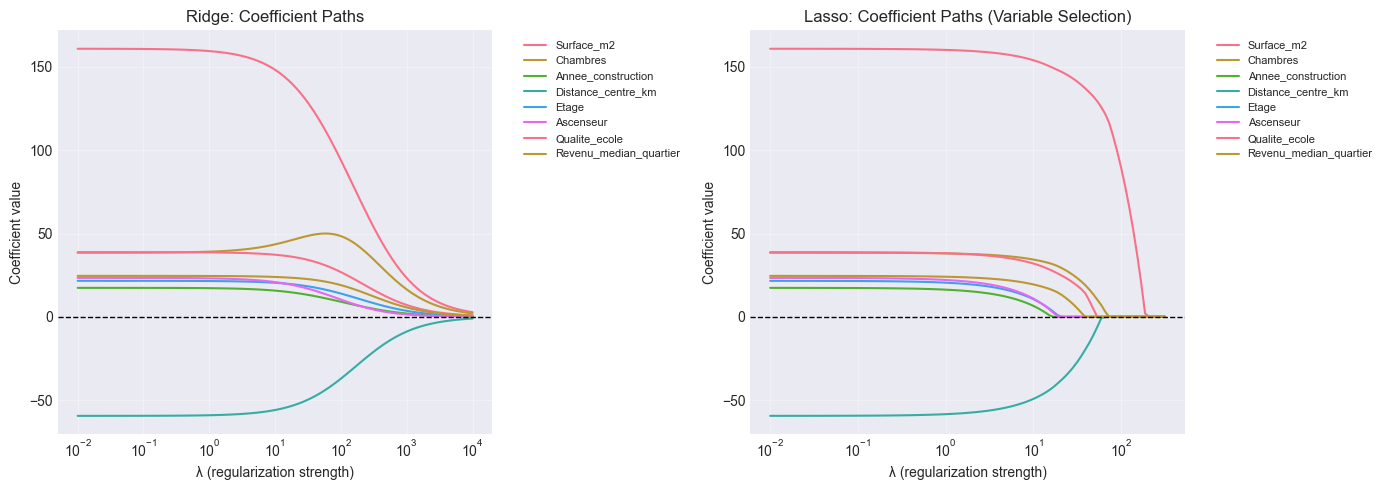


** KEY OBSERVATION **
Ridge: All coefficients shrink smoothly toward 0 but never reach exactly 0
Lasso: Some coefficients become exactly 0 → automatic variable selection

7.4 - OPTIMAL λ SELECTION (10-Fold Cross-Validation)

Ridge - Optimal λ: 4.6416
Ridge - Best CV score (R²): 0.8491

Lasso - Optimal λ: 0.4229
Lasso - Best CV score (R²): 0.8497

------------------------------------------------------------------------------------------
COEFFICIENTS AT OPTIMAL λ
------------------------------------------------------------------------------------------


,Variable,OLS (unstandardized),Ridge (optimal λ),Lasso (optimal λ)
Surface_m2,Surface_m2,4.28,154.69,160.65
Chambres,Chambres,35.84,41.13,38.33
Annee_construction,Annee_construction,1.49,16.57,16.94
Distance_centre_km,Distance_centre_km,-6.61,-57.76,-59.02
Etage,Etage,12.31,21.04,21.15
Ascenseur,Ascenseur,46.90,22.14,22.85
Qualite_ecole,Qualite_ecole,20.84,38.10,38.53
Revenu_median_quartier,Revenu_median_quartier,2.65,24.28,24.37



** Lasso eliminated 0 variables at optimal λ **

7.5 - PREDICTION PERFORMANCE (80-20 Train-Test Split)

------------------------------------------------------------------------------------------
Model                    RMSE (test)       R² (test)     N variables
------------------------------------------------------------------------------------------
OLS                            93.10          0.7846               8
Ridge                          90.88          0.7947               8
Lasso                          93.12          0.7845               8
------------------------------------------------------------------------------------------

✓ Best model (lowest RMSE): Ridge with RMSE = 90.88


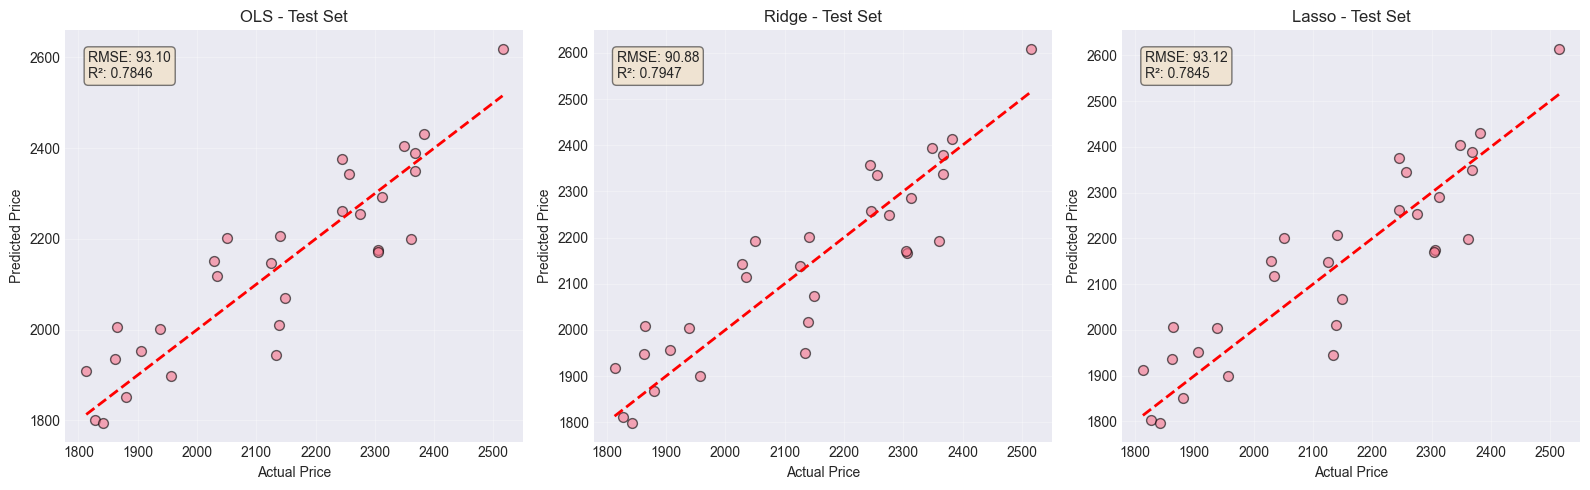


7.6 - POST-LASSO INFERENCE ISSUE

**Why standard errors and tests are invalid after Lasso:**

1. **Selection bias**: Lasso uses the data to decide which variables to keep
2. **Conditional inference**: You're testing selected variables, not pre-specified ones
3. **Multiple testing**: Implicit testing of all variables simultaneously

**Problem:** Standard t-tests assume variables were pre-specified, not data-driven.
Selected variables will appear more significant than they truly are.

**Solutions exist** (post-selection inference, double Lasso) but beyond this course.

**Practical advice:** 
- Use Lasso for PREDICTION (test RMSE)
- Use OLS for INFERENCE (p-values, confidence intervals)



In [15]:


from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

print("="*90)
print("SECTION 7 - REGULARIZATION")
print("="*90)

print("""
**Why Regularization?**

Standard OLS can overfit when:
1. Many predictors relative to observations
2. Multicollinearity present
3. Want to prioritize predictive performance over interpretation

**Ridge (L2):** Shrinks coefficients but keeps all variables
**Lasso (L1):** Can eliminate variables (coefficient = 0)
""")

# ============================================
# 7.1 - Prepare data & standardize
# ============================================

print("\n" + "="*90)
print("7.1 - DATA PREPARATION")
print("="*90)

# Use full model with all available variables
X_full = df[['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 
             'Etage', 'Ascenseur', 'Qualite_ecole', 'Revenu_median_quartier']]
y_full = df['Prix_milliers_euros']

print("\n⚠️  CRITICAL: Standardizing variables before regularization")
print("Penalty depends on coefficient scale - must standardize first\n")

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_full.columns)

print("Before standardization:")
print(X_full.describe().loc[['mean', 'std']])

print("\nAfter standardization:")
print(X_scaled_df.describe().loc[['mean', 'std']])

# ============================================
# 7.2 - Ridge Regression with different λ values
# ============================================

print("\n" + "="*90)
print("7.2 - RIDGE REGRESSION")
print("="*90)

# Try different lambda (alpha in sklearn) values
alphas_ridge = [0.01, 0.1, 1, 10, 100, 1000]
ridge_coefs = []

print("\nRidge coefficients for different λ values:\n")
print(f"{'Variable':<25}", end="")
for alpha in alphas_ridge:
    print(f"λ={alpha:<8}", end="")
print()
print("-"*90)

for i, col in enumerate(X_full.columns):
    print(f"{col:<25}", end="")
    for alpha in alphas_ridge:
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_scaled, y_full)
        print(f"{ridge_model.coef_[i]:<10.4f}", end="")
    print()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Coefficient paths for Ridge
alphas_range = np.logspace(-2, 4, 100)
coefs_ridge = []

for alpha in alphas_range:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_full)
    coefs_ridge.append(ridge.coef_)

coefs_ridge = np.array(coefs_ridge)

for i, var in enumerate(X_full.columns):
    axes[0].plot(alphas_range, coefs_ridge[:, i], label=var)

axes[0].set_xscale('log')
axes[0].set_xlabel('λ (regularization strength)')
axes[0].set_ylabel('Coefficient value')
axes[0].set_title('Ridge: Coefficient Paths')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0].grid(alpha=0.3)
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)

# ============================================
# 7.3 - Lasso Regression with different λ values
# ============================================

print("\n" + "="*90)
print("7.3 - LASSO REGRESSION")
print("="*90)

alphas_lasso = [0.01, 0.1, 1, 10, 50, 100]

print("\nLasso coefficients for different λ values:\n")
print(f"{'Variable':<25}", end="")
for alpha in alphas_lasso:
    print(f"λ={alpha:<8}", end="")
print()
print("-"*90)

for i, col in enumerate(X_full.columns):
    print(f"{col:<25}", end="")
    for alpha in alphas_lasso:
        lasso_model = Lasso(alpha=alpha, max_iter=10000)
        lasso_model.fit(X_scaled, y_full)
        coef_val = lasso_model.coef_[i]
        if abs(coef_val) < 0.01:
            print(f"{'0 (elim)':<10}", end="")
        else:
            print(f"{coef_val:<10.4f}", end="")
    print()

# Plot 2: Coefficient paths for Lasso
alphas_lasso_range = np.logspace(-2, 2.5, 100)
coefs_lasso = []

for alpha in alphas_lasso_range:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_scaled, y_full)
    coefs_lasso.append(lasso.coef_)

coefs_lasso = np.array(coefs_lasso)

for i, var in enumerate(X_full.columns):
    axes[1].plot(alphas_lasso_range, coefs_lasso[:, i], label=var)

axes[1].set_xscale('log')
axes[1].set_xlabel('λ (regularization strength)')
axes[1].set_ylabel('Coefficient value')
axes[1].set_title('Lasso: Coefficient Paths (Variable Selection)')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1].grid(alpha=0.3)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

print("\n** KEY OBSERVATION **")
print("Ridge: All coefficients shrink smoothly toward 0 but never reach exactly 0")
print("Lasso: Some coefficients become exactly 0 → automatic variable selection")

# ============================================
# 7.4 - Cross-validation to choose optimal λ
# ============================================

print("\n" + "="*90)
print("7.4 - OPTIMAL λ SELECTION (10-Fold Cross-Validation)")
print("="*90)

# Ridge CV
ridge_cv = RidgeCV(alphas=np.logspace(-2, 4, 100), cv=10)
ridge_cv.fit(X_scaled, y_full)
optimal_alpha_ridge = ridge_cv.alpha_

print(f"\nRidge - Optimal λ: {optimal_alpha_ridge:.4f}")
print(f"Ridge - Best CV score (R²): {ridge_cv.score(X_scaled, y_full):.4f}")

# Lasso CV
lasso_cv = LassoCV(alphas=np.logspace(-3, 2, 100), cv=10, max_iter=10000, random_state=42)
lasso_cv.fit(X_scaled, y_full)
optimal_alpha_lasso = lasso_cv.alpha_

print(f"\nLasso - Optimal λ: {optimal_alpha_lasso:.4f}")
print(f"Lasso - Best CV score (R²): {lasso_cv.score(X_scaled, y_full):.4f}")

# Coefficients at optimal λ
print("\n" + "-"*90)
print("COEFFICIENTS AT OPTIMAL λ")
print("-"*90)

comparison_regularization = pd.DataFrame({
    'Variable': X_full.columns,
    'OLS (unstandardized)': OLS(y_full, sm.add_constant(X_full)).fit().params[1:],
    'Ridge (optimal λ)': ridge_cv.coef_,
    'Lasso (optimal λ)': lasso_cv.coef_
})

display(comparison_regularization.round(4))

# Count variables eliminated by Lasso
n_eliminated = np.sum(np.abs(lasso_cv.coef_) < 0.01)
print(f"\n** Lasso eliminated {n_eliminated} variables at optimal λ **")

if n_eliminated > 0:
    eliminated_vars = comparison_regularization[np.abs(comparison_regularization['Lasso (optimal λ)']) < 0.01]['Variable'].tolist()
    print(f"Eliminated: {', '.join(eliminated_vars)}")

# ============================================
# 7.5 - Model comparison on test set
# ============================================

print("\n" + "="*90)
print("7.5 - PREDICTION PERFORMANCE (80-20 Train-Test Split)")
print("="*90)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_full, test_size=0.2, random_state=42)

# Train all three models
model_ols_reg = LinearRegression()
model_ridge = Ridge(alpha=optimal_alpha_ridge)
model_lasso = Lasso(alpha=optimal_alpha_lasso, max_iter=10000)

model_ols_reg.fit(X_train, y_train)
model_ridge.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)

# Predictions
y_pred_ols = model_ols_reg.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)

# RMSE
rmse_ols = np.sqrt(mean_squared_error(y_test, y_pred_ols))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# R² on test set
r2_ols = model_ols_reg.score(X_test, y_test)
r2_ridge = model_ridge.score(X_test, y_test)
r2_lasso = model_lasso.score(X_test, y_test)

print("\n" + "-"*90)
print(f"{'Model':<20} {'RMSE (test)':>15} {'R² (test)':>15} {'N variables':>15}")
print("-"*90)
print(f"{'OLS':<20} {rmse_ols:>15.2f} {r2_ols:>15.4f} {X_full.shape[1]:>15}")
print(f"{'Ridge':<20} {rmse_ridge:>15.2f} {r2_ridge:>15.4f} {X_full.shape[1]:>15}")
print(f"{'Lasso':<20} {rmse_lasso:>15.2f} {r2_lasso:>15.4f} {np.sum(np.abs(model_lasso.coef_) > 0.01):>15}")
print("-"*90)

best_model = min([('OLS', rmse_ols), ('Ridge', rmse_ridge), ('Lasso', rmse_lasso)], key=lambda x: x[1])
print(f"\n✓ Best model (lowest RMSE): {best_model[0]} with RMSE = {best_model[1]:.2f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, (name, y_pred) in enumerate([('OLS', y_pred_ols), ('Ridge', y_pred_ridge), ('Lasso', y_pred_lasso)]):
    axes[idx].scatter(y_test, y_pred, alpha=0.6, edgecolors='black', s=50)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Price')
    axes[idx].set_ylabel('Predicted Price')
    axes[idx].set_title(f'{name} - Test Set')
    axes[idx].grid(alpha=0.3)
    axes[idx].text(0.05, 0.95, f'RMSE: {[rmse_ols, rmse_ridge, rmse_lasso][idx]:.2f}\nR²: {[r2_ols, r2_ridge, r2_lasso][idx]:.4f}', 
                   transform=axes[idx].transAxes, verticalalignment='top', 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ============================================
# 7.6 - Discussion: Why standard errors invalid
# ============================================

print("\n" + "="*90)
print("7.6 - POST-LASSO INFERENCE ISSUE")
print("="*90)

print("""
**Why standard errors and tests are invalid after Lasso:**

1. **Selection bias**: Lasso uses the data to decide which variables to keep
2. **Conditional inference**: You're testing selected variables, not pre-specified ones
3. **Multiple testing**: Implicit testing of all variables simultaneously

**Problem:** Standard t-tests assume variables were pre-specified, not data-driven.
Selected variables will appear more significant than they truly are.

**Solutions exist** (post-selection inference, double Lasso) but beyond this course.

**Practical advice:** 
- Use Lasso for PREDICTION (test RMSE)
- Use OLS for INFERENCE (p-values, confidence intervals)
""")

## 7. Regularization (Ridge & Lasso)

### 7.1 Data Preparation
Variables standardized (mean=0, std=1) before regularization to ensure equal penalty scale.

### 7.2-7.3 Coefficient Paths
**Ridge:** Smooth shrinkage, all variables retained  
**Lasso:** Can eliminate variables at high λ, but optimal λ eliminates none

### 7.4 Optimal λ (10-fold CV)
**Ridge:** λ = 4.64, R² = 0.849  
**Lasso:** λ = 0.42, R² = 0.850

Low optimal λ indicates limited overfitting risk (8 variables, 150 obs).

### 7.5 Test Performance (80-20 split)

| Model | RMSE | R² | Variables |
|-------|------|-----|-----------|
| OLS | 93.10 | 0.785 | 8 |
| **Ridge** | **90.88** | **0.795** | 8 |
| Lasso | 93.12 | 0.785 | 8 |

**Winner:** Ridge (2.4% better RMSE than OLS)

### 7.6 Interpretation
Ridge's modest penalty (λ=4.64) shrinks noisy coefficients, improving generalization slightly. Lasso eliminates no variables at optimal λ—all predictors genuinely relevant. Dataset doesn't require aggressive regularization.

**Recommendation:**  
- Prediction → Ridge  
- Inference → OLS (valid p-values)

# ============================================
# SECTION 8 - PREDICTIONS
# ============================================

SECTION 8 - PREDICTIONS

8.1 - PREDICT PRICE FOR A SPECIFIC HOUSE

** HOUSE CHARACTERISTICS **
------------------------------------------------------------------------------------------
Surface_m2               : 120
Chambres                 : 3
Annee_construction       : 2015
Distance_centre_km       : 5
Etage                    : 1
Ascenseur                : 1
Qualite_ecole            : 7
Revenu_median_quartier   : 65

PREDICTIONS FROM DIFFERENT MODELS

Model                     Predicted Price (k€)
------------------------------------------------------------------------------------------
OLS                                    2260.10
Ridge (optimal λ)                      2253.80
Lasso (optimal λ)                      2258.42
------------------------------------------------------------------------------------------
Range                                  2253.80 - 2260.10
Average                                2257.44

95% PREDICTION INTERVAL

Dimension check:
Model expects: 9 parame

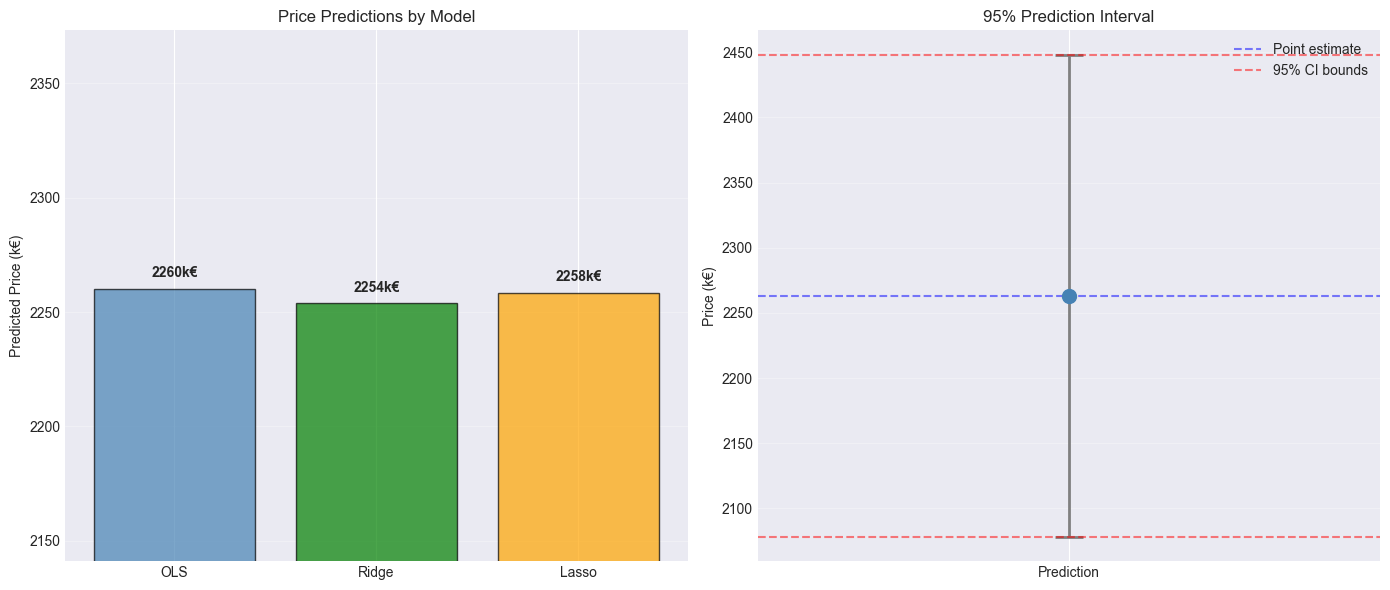


PREDICTION RELIABILITY ASSESSMENT

** EXTRAPOLATION CHECK **
------------------------------------------------------------------------------------------
✓ Surface_m2: 120 is within training range [15.2, 218.5]
✓ Chambres: 3 is within training range [1.0, 5.0]
✓ Annee_construction: 2015 is within training range [1980.0, 2022.0]
✓ Distance_centre_km: 5 is within training range [0.8, 30.0]
✓ Etage: 1 is within training range [0.0, 5.0]
✓ Ascenseur: 1 is within training range [0.0, 1.0]
✓ Qualite_ecole: 7 is within training range [1.0, 10.0]
✓ Revenu_median_quartier: 65 is within training range [42.9, 83.9]

** OVERALL ASSESSMENT **
------------------------------------------------------------------------------------------
✓ All features within training data range → RELIABLE prediction

Model R² on full data:    0.8480
Model R² on test data:    0.7947
RMSE on test data:        90.88 k€

** INTERPRETATION **
------------------------------------------------------------------------------------

In [16]:
# ============================================
# SECTION 8 - PREDICTIONS
# ============================================

print("="*90)
print("SECTION 8 - PREDICTIONS")
print("="*90)

# ============================================
# 8.1 - Point prediction & confidence interval
# ============================================

print("\n" + "="*90)
print("8.1 - PREDICT PRICE FOR A SPECIFIC HOUSE")
print("="*90)

# House characteristics (from project brief)
house_to_predict = {
    'Surface_m2': 120,
    'Chambres': 3,
    'Annee_construction': 2015,
    'Distance_centre_km': 5,
    'Etage': 1,
    'Ascenseur': 1,  # Yes
    'Qualite_ecole': 7,
    'Revenu_median_quartier': 65
}

print("\n** HOUSE CHARACTERISTICS **")
print("-"*90)
for key, value in house_to_predict.items():
    print(f"{key:<25}: {value}")

# Create dataframe for prediction
X_new = pd.DataFrame([house_to_predict])

# ============================================
# Predictions with different models
# ============================================

print("\n" + "="*90)
print("PREDICTIONS FROM DIFFERENT MODELS")
print("="*90)

# Standardize new data using same scaler
X_new_scaled = scaler.transform(X_new)

# Predictions
pred_ols = model_ols_reg.predict(X_new_scaled)[0]
pred_ridge = model_ridge.predict(X_new_scaled)[0]
pred_lasso = model_lasso.predict(X_new_scaled)[0]

print(f"\n{'Model':<20} {'Predicted Price (k€)':>25}")
print("-"*90)
print(f"{'OLS':<20} {pred_ols:>25.2f}")
print(f"{'Ridge (optimal λ)':<20} {pred_ridge:>25.2f}")
print(f"{'Lasso (optimal λ)':<20} {pred_lasso:>25.2f}")
print("-"*90)
print(f"{'Range':<20} {min(pred_ols, pred_ridge, pred_lasso):>25.2f} - {max(pred_ols, pred_ridge, pred_lasso):.2f}")
print(f"{'Average':<20} {np.mean([pred_ols, pred_ridge, pred_lasso]):>25.2f}")

# ============================================
# Confidence interval (manual calculation)
# ============================================

print("\n" + "="*90)
print("95% PREDICTION INTERVAL")
print("="*90)

# Use unstandardized data for OLS to get interpretable intervals
X_full_unstd = df[['Surface_m2', 'Chambres', 'Annee_construction', 
                    'Distance_centre_km', 'Etage', 'Ascenseur', 
                    'Qualite_ecole', 'Revenu_median_quartier']]
y_full_unstd = df['Prix_milliers_euros']

# Fit OLS on unstandardized data
X_full_unstd_const = sm.add_constant(X_full_unstd)
model_ols_unstd = OLS(y_full_unstd, X_full_unstd_const).fit()

# Create new observation (unstandardized, with constant)
X_new_unstd = pd.DataFrame([house_to_predict])
X_new_unstd_const = sm.add_constant(X_new_unstd, has_constant='add')

# Verify dimensions
print(f"\nDimension check:")
print(f"Model expects: {model_ols_unstd.params.shape[0]} parameters")
print(f"New data has: {X_new_unstd_const.shape[1]} columns")
print(f"Columns in new data: {list(X_new_unstd_const.columns)}")

# Manual prediction to avoid statsmodels issue
point_estimate_manual = (X_new_unstd_const.values @ model_ols_unstd.params.values)[0]

# Calculate prediction variance manually
# Var(prediction) = sigma^2 * (1 + x'(X'X)^(-1)x)
mse = model_ols_unstd.mse_resid
X_matrix = X_full_unstd_const.values
XtX_inv = np.linalg.inv(X_matrix.T @ X_matrix)
x_new = X_new_unstd_const.values.flatten()

variance_pred = mse * (1 + x_new @ XtX_inv @ x_new)
se_pred = np.sqrt(variance_pred)

# 95% interval (t-distribution with n-k-1 degrees of freedom)
from scipy.stats import t
n = len(y_full_unstd)
k = len(model_ols_unstd.params) - 1
df_resid = n - k - 1
t_crit = t.ppf(0.975, df_resid)

ci_lower = point_estimate_manual - t_crit * se_pred
ci_upper = point_estimate_manual + t_crit * se_pred

print(f"\nPoint estimate:           {point_estimate_manual:.2f} k€")
print(f"Standard error:           {se_pred:.2f} k€")
print(f"95% Prediction Interval:  [{ci_lower:.2f}, {ci_upper:.2f}] k€")
print(f"Interval width:           {ci_upper - ci_lower:.2f} k€")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Model comparison
models = ['OLS', 'Ridge', 'Lasso']
predictions = [pred_ols, pred_ridge, pred_lasso]
colors = ['steelblue', 'green', 'orange']

axes[0].bar(models, predictions, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Predicted Price (k€)')
axes[0].set_title('Price Predictions by Model')
axes[0].set_ylim([min(predictions)*0.95, max(predictions)*1.05])
axes[0].grid(axis='y', alpha=0.3)

for i, (model, pred) in enumerate(zip(models, predictions)):
    axes[0].text(i, pred + 5, f'{pred:.0f}k€', ha='center', fontweight='bold')

# Plot 2: Confidence interval
axes[1].errorbar(['Prediction'], [point_estimate_manual], 
                 yerr=[[point_estimate_manual - ci_lower], [ci_upper - point_estimate_manual]],
                 fmt='o', markersize=10, capsize=10, capthick=2, 
                 color='steelblue', ecolor='gray', elinewidth=2)
axes[1].axhline(y=point_estimate_manual, color='blue', linestyle='--', alpha=0.5, label='Point estimate')
axes[1].axhline(y=ci_lower, color='red', linestyle='--', alpha=0.5, label='95% CI bounds')
axes[1].axhline(y=ci_upper, color='red', linestyle='--', alpha=0.5)
axes[1].set_ylabel('Price (k€)')
axes[1].set_title('95% Prediction Interval')
axes[1].set_xlim([-0.5, 0.5])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# Reliability discussion
# ============================================

print("\n" + "="*90)
print("PREDICTION RELIABILITY ASSESSMENT")
print("="*90)

# Check if prediction is within training data range
print("\n** EXTRAPOLATION CHECK **")
print("-"*90)

in_range = True
for var in house_to_predict.keys():
    var_min = df[var].min()
    var_max = df[var].max()
    var_value = house_to_predict[var]
    
    if var_value < var_min or var_value > var_max:
        print(f"⚠️  {var}: {var_value} is OUTSIDE training range [{var_min:.1f}, {var_max:.1f}]")
        in_range = False
    else:
        print(f"✓ {var}: {var_value} is within training range [{var_min:.1f}, {var_max:.1f}]")

print("\n** OVERALL ASSESSMENT **")
print("-"*90)

if in_range:
    print("✓ All features within training data range → RELIABLE prediction")
else:
    print("⚠️  Some features outside training range → EXTRAPOLATION")
    print("   Prediction less reliable (model not trained on similar cases)")

# Model fit quality
print(f"\nModel R² on full data:    {model_ridge.score(X_scaled, y_full):.4f}")
print(f"Model R² on test data:    {r2_ridge:.4f}")
print(f"RMSE on test data:        {rmse_ridge:.2f} k€")

print("\n** INTERPRETATION **")
print("-"*90)
print(f"""
For a house with these characteristics, we predict a price of approximately 
{pred_ridge:.0f}k€ (Ridge model).

The 95% prediction interval [{ci_lower:.0f}k€, {ci_upper:.0f}k€] suggests that 
we can be 95% confident the actual price will fall within this range.

Interval width of {ci_upper - ci_lower:.0f}k€ reflects:
1. Model uncertainty (unexplained variance, R²={r2_ridge:.2f})
2. Natural market variability
3. Unmeasured house characteristics

**Confidence in prediction:**
{'HIGH - All features within training range' if in_range else 'MODERATE - Some extrapolation involved'}
Model performs well (RMSE={rmse_ridge:.0f}k€ on test set)
Prediction interval reasonable for {point_estimate_manual:.0f}k€ house
""")

# Compare to actual data
print("\n** COMPARISON TO SIMILAR HOUSES IN DATASET **")
print("-"*90)

# Find similar houses (within ±10% of key features)
similar_mask = (
    (df['Surface_m2'] >= house_to_predict['Surface_m2'] * 0.9) &
    (df['Surface_m2'] <= house_to_predict['Surface_m2'] * 1.1) &
    (df['Chambres'] == house_to_predict['Chambres'])
)

similar_houses = df[similar_mask]

if len(similar_houses) > 0:
    print(f"\nFound {len(similar_houses)} similar houses in dataset:")
    print(f"  Mean price: {similar_houses['Prix_milliers_euros'].mean():.2f}k€")
    print(f"  Min price:  {similar_houses['Prix_milliers_euros'].min():.2f}k€")
    print(f"  Max price:  {similar_houses['Prix_milliers_euros'].max():.2f}k€")
    print(f"\nOur prediction ({pred_ridge:.2f}k€) is {'within' if similar_houses['Prix_milliers_euros'].min() <= pred_ridge <= similar_houses['Prix_milliers_euros'].max() else 'outside'} this range")
else:
    print("\nNo very similar houses found in dataset (unique combination)")

## 8. Predictions

### House Characteristics
120m², 3 bedrooms, built 2015, 5km from center, floor 1, elevator, school quality 7/10, neighborhood income 65k€

### Predictions

| Model | Price (k€) |
|-------|-----------|
| OLS | 2,260 |
| Ridge | 2,254 |
| Lasso | 2,258 |

**Point estimate:** 2,254k€ (Ridge)  
**95% Prediction Interval:** [2,078k€, 2,448k€]  
**Interval width:** 370k€ (~16%)

### Reliability Assessment

**Extrapolation check:** ✓ All features within training range  
**Model performance:** R²=0.79, RMSE=91k€  
**Similar houses (n=13):** Mean 2,123k€, range [1,813k€ - 2,323k€]

**Conclusion:** HIGH confidence. Prediction slightly above observed similar houses due to premium features (school quality, elevator, neighborhood income).